# Surprise Housing Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company is looking at prospective properties to buy to enter the market. We will build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## I. Data understanding

Importing required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
# Print all columns
pd.set_option('display.max_columns', None)
# Prevent panda from reading NA as 'NaN'
df = pd.read_csv('train.csv');
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*There are a lot of null cells, we will need to clean it in the next step*

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## II. Data Cleaning

### 2.1. Remove unused column

Remove `Id` column because it is just an indexing column

In [7]:
df.drop(columns="Id", axis=1, inplace=True);

### 2.2. Fill out missing value

Let's find the percentage of missing value in each column

In [8]:
def print_missing_value_percentage():
    missing_value_percentage = (df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)
    print(missing_value_percentage.head(10))

print_missing_value_percentage()

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64


For `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu` the value is null because the house do not have those features, let's replace them with `"NA"`

In [9]:
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
for column in columns:
    df[column] = df[column].fillna('NA')

print_missing_value_percentage()

LotFrontage     17.739726
GarageFinish     5.547945
GarageCond       5.547945
GarageType       5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
dtype: float64


We can see that the `GaraceFinish`, `GarageCond`, `GarageYrBlt`, `GarageQual`, `GarageType` columns are having the same percentage of missing value, indicating that those houses do not have a garage. Let's fill it with `NA`.

For `GarageYrBlt` let's do it after train-test spliting

In [10]:
columns = ['GarageFinish', 'GarageCond', 'GarageQual', 'GarageType']
for column in columns:
    df[column] = df[column].fillna('NA')

print_missing_value_percentage()

LotFrontage     17.739726
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


Let's fill in `BsmtFinType2`, `BsmtExposure`, `BsmtFinType1`, `BsmtQual`, `BsmtCond` with `NA` too

In [11]:
columns = ['BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']
for column in columns:
    df[column] = df[column].fillna('NA')

print_missing_value_percentage()

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
dtype: float64


Let's fill `NA` for `MasVnrType`, and `0` for `MasVnrArea`

In [12]:
df.MasVnrArea = df.MasVnrArea.fillna(0)
df.MasVnrType = df.MasVnrType.fillna('NA')

print_missing_value_percentage()

LotFrontage     17.739726
GarageYrBlt      5.547945
Electrical       0.068493
KitchenAbvGr     0.000000
GarageFinish     0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
dtype: float64


Let's inpect `Electrical` column. Since the number of null value in `Electrical` column is very low, we can fill them with the most occurring value

In [13]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
df.Electrical = df.Electrical.fillna('SBrkr')

Finally, the `LotFrontage` or `GarageYrBlt`, a numerical column. We can use mean or median to fill out missing value.

**However, for those 2 columns, we should do it after the train-test split, because train data is for the past data, and split data should be for future data, we should not overlap them to choose the `mean` or `median` or the `most_frequent`**

In [15]:
# Print missing value percentage
print_missing_value_percentage()

LotFrontage     17.739726
GarageYrBlt      5.547945
MSSubClass       0.000000
KitchenAbvGr     0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
dtype: float64


We've treated all missing value, except for `LotFrontage` and `GarageYrBlt`, we will impute missing value after train test split 

### 2.3. Converting Data Type

`MSSubClass`, `OverallQual`, `OverallCond`should be categorical column

In [16]:
columns = ['MSSubClass', 'OverallQual', 'OverallCond']
for col in columns:
    df[col] = df[col].astype('category')
    
# Also convert object type to category type

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

### 2.4. Creating new column

We can create a new column called `Age` based on `YearBuilt` and `YrSold`

In [17]:
df['Age'] = df['YrSold'] - df['YearBuilt']

#Dropping the old columns
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

## III. Data Visualization

### 3.1. Visualizing numeric values

In [18]:
# Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age
0,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,5
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,31
2,68.0,11250,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,7
3,60.0,9550,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,91
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,250000,8


For each column, we will draw 3 plot in one row:
- First plot is the distribution (histogram plot) of value
- Second plot is the 

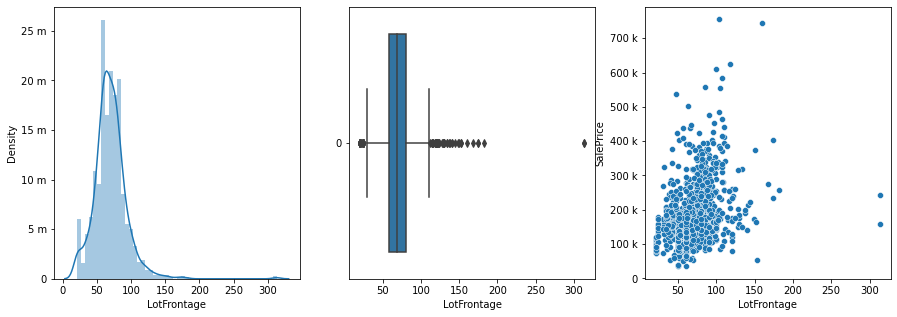

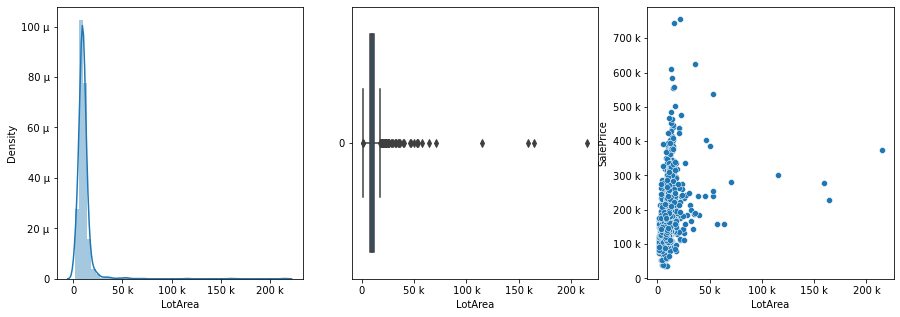

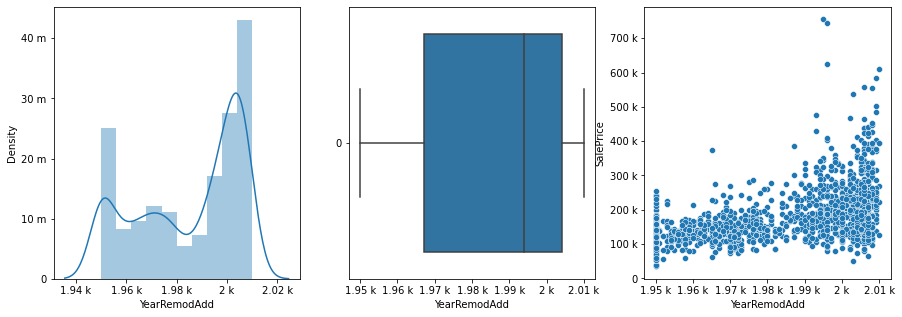

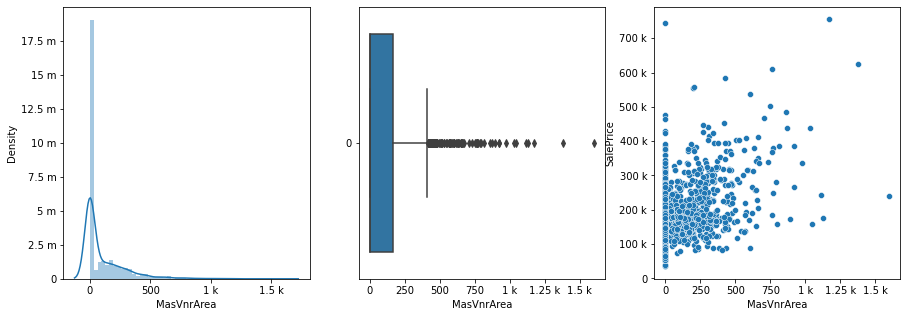

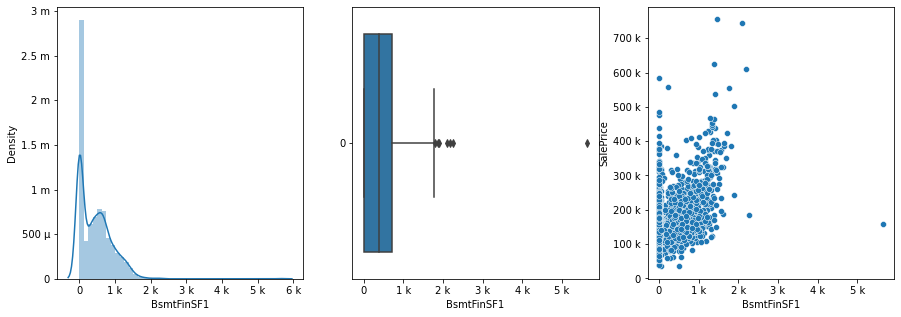

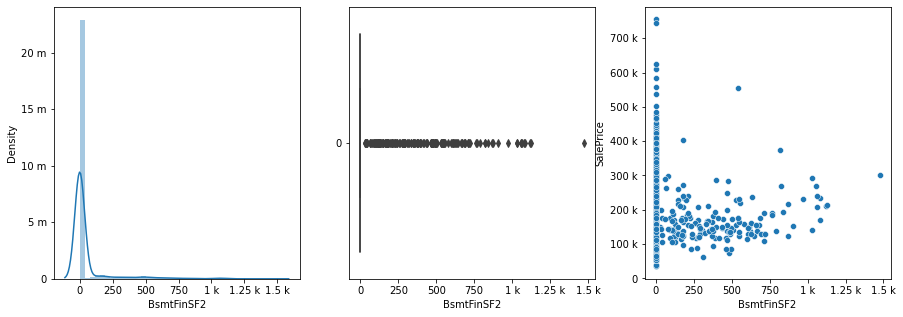

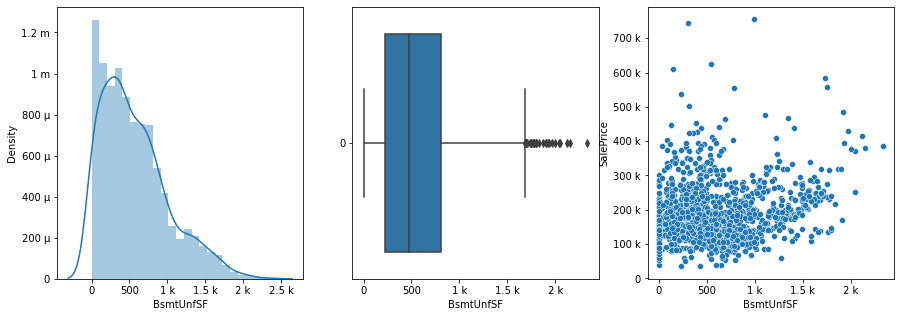

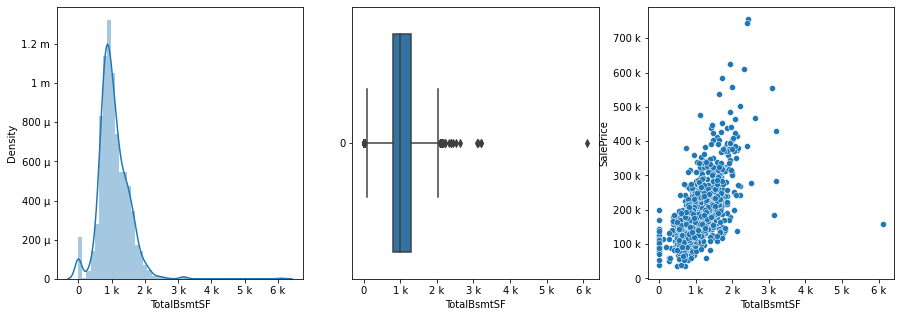

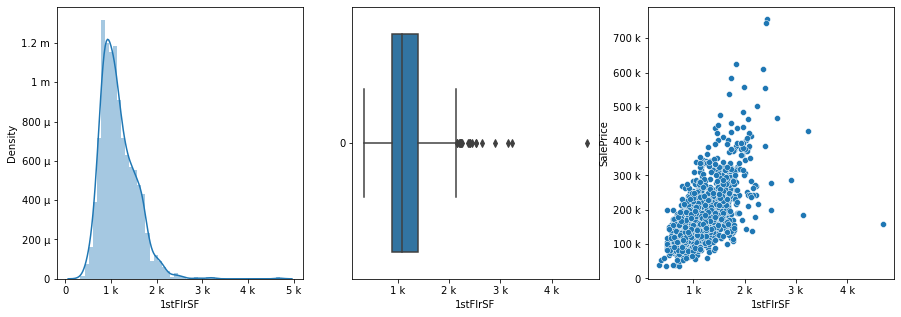

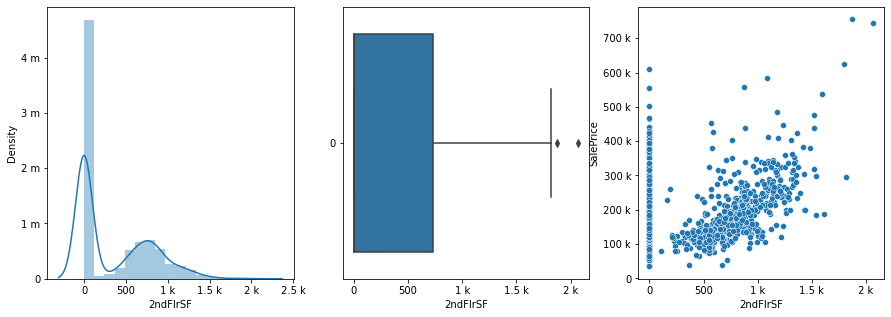

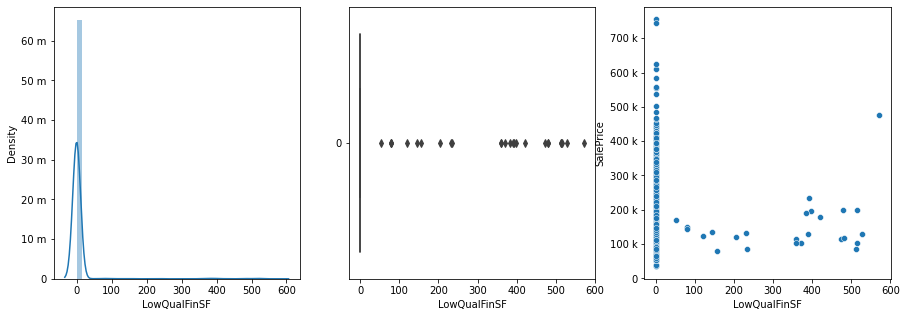

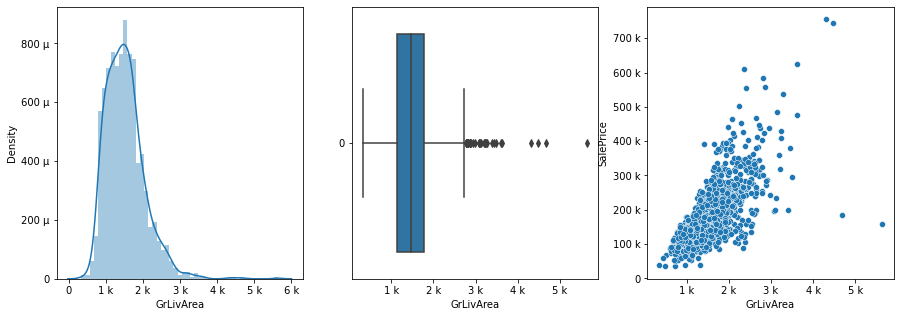

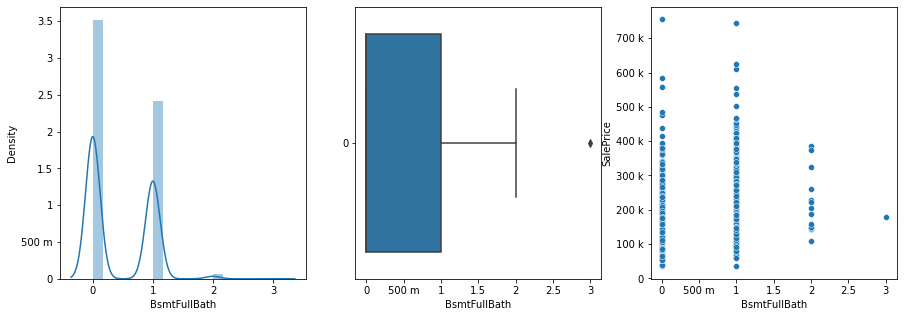

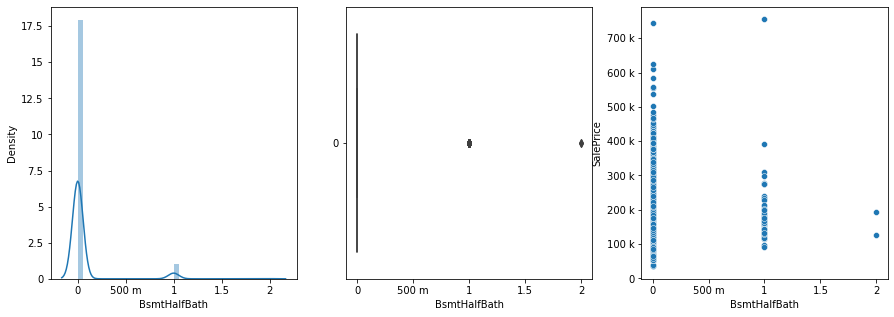

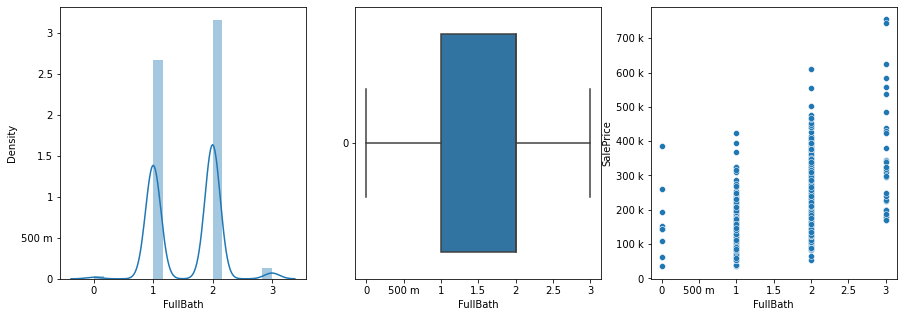

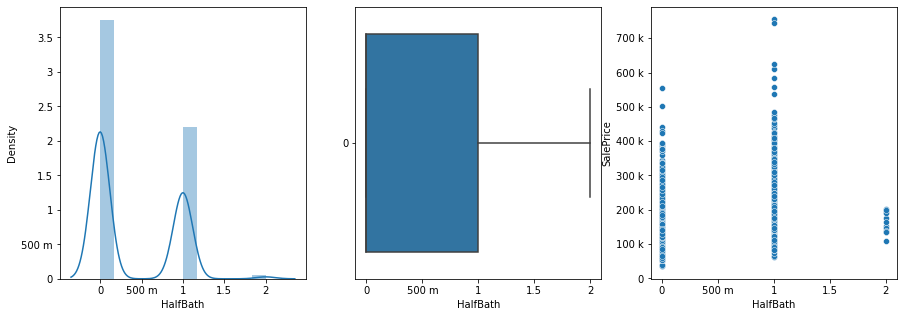

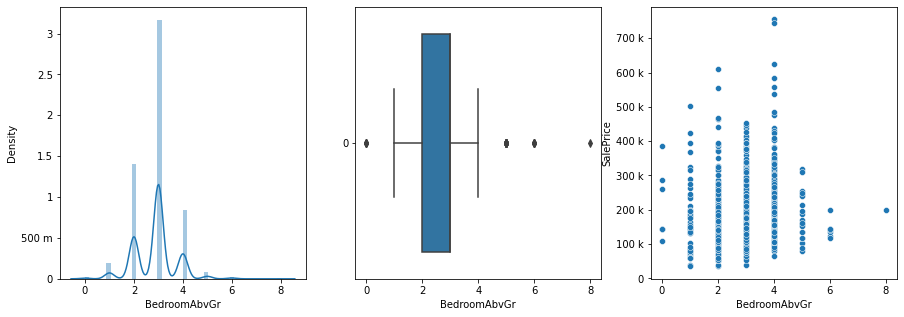

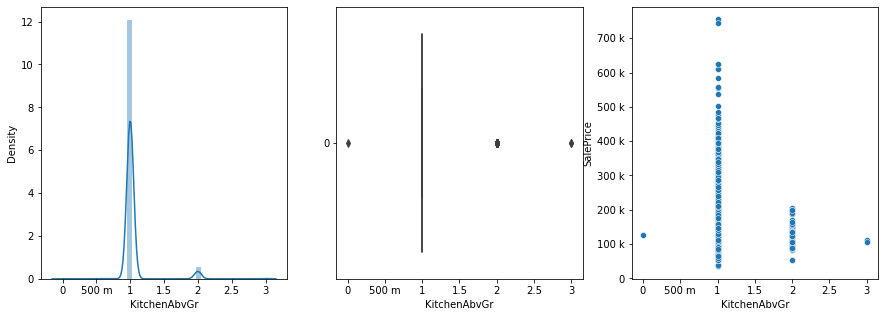

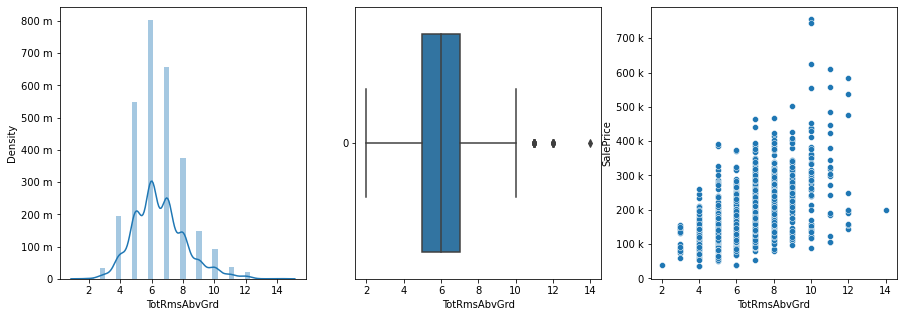

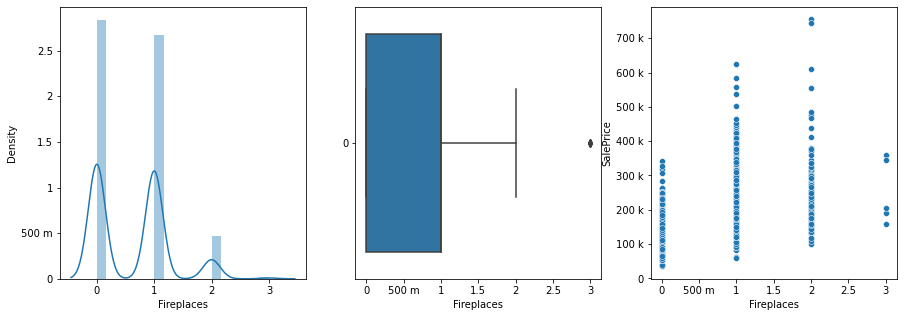

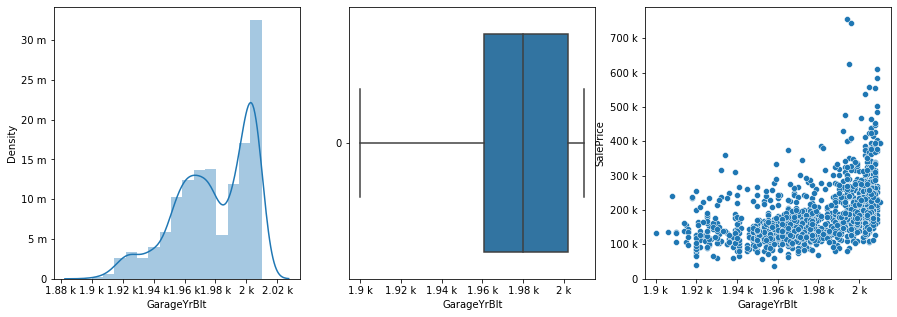

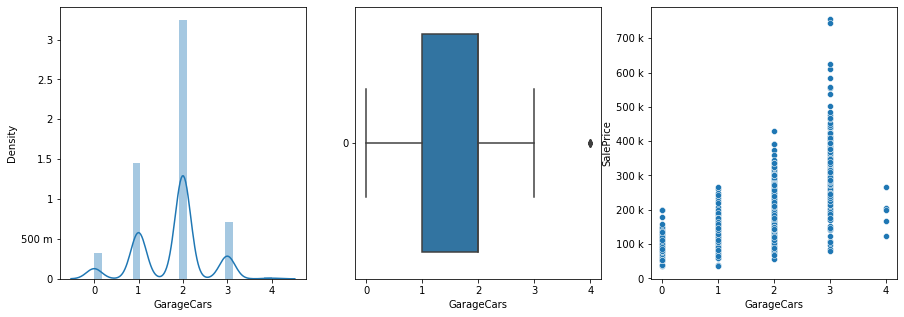

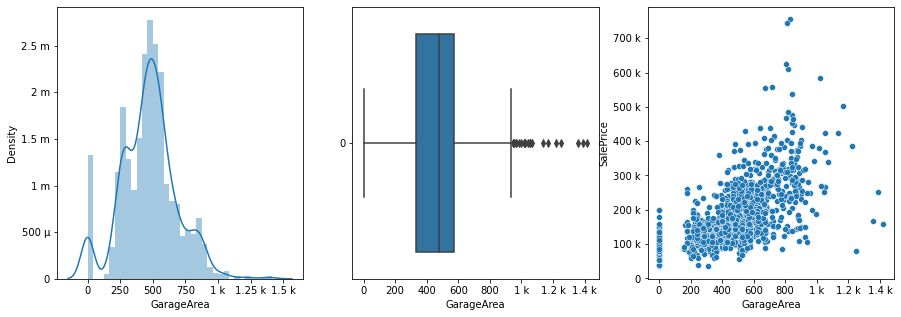

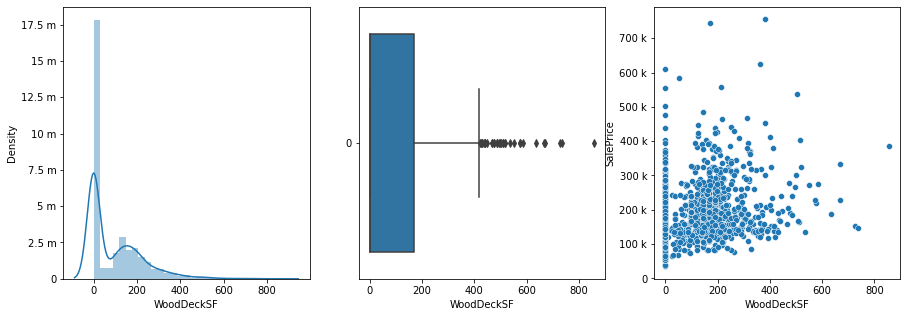

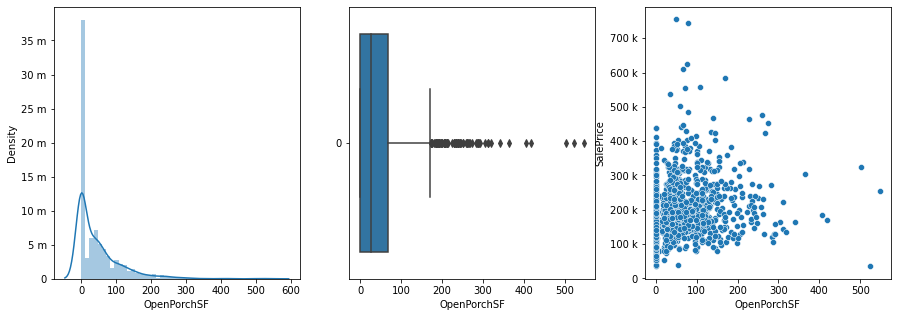

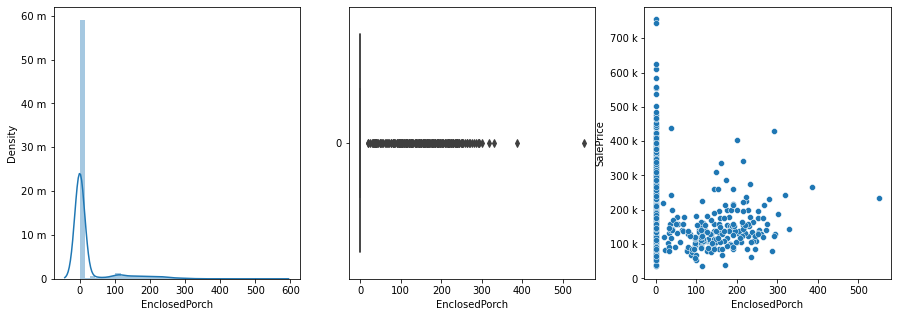

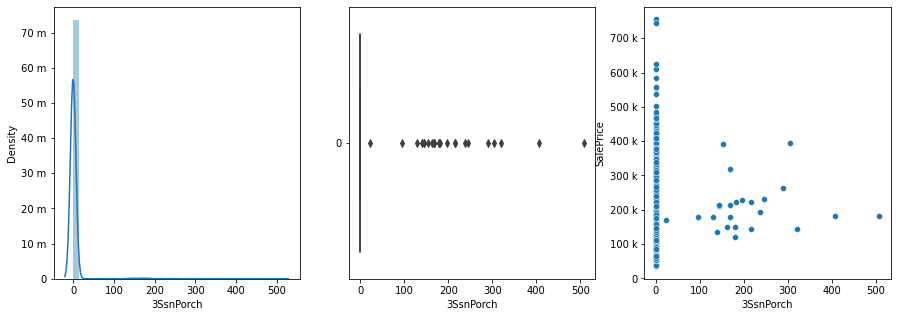

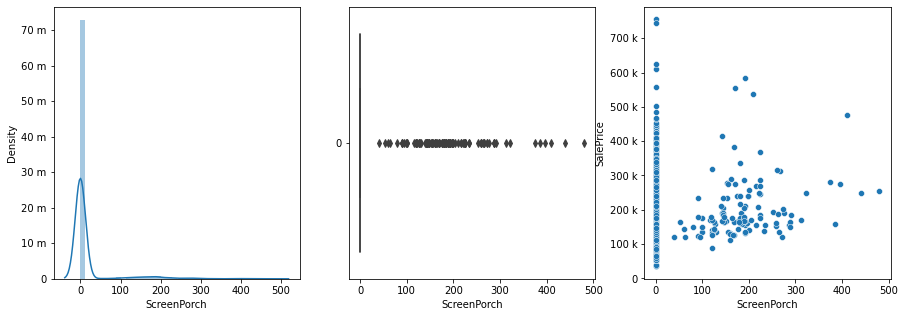

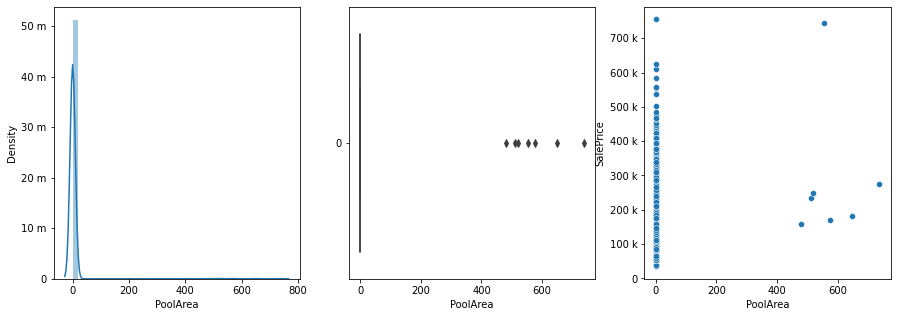

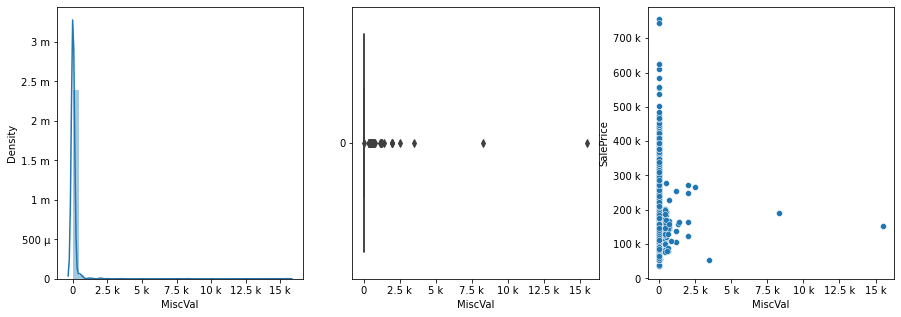

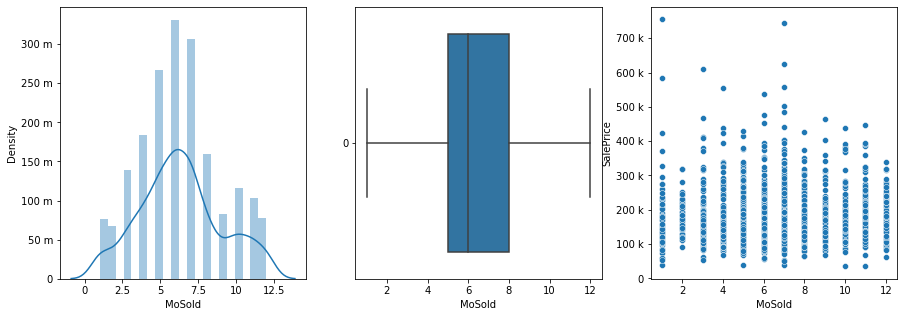

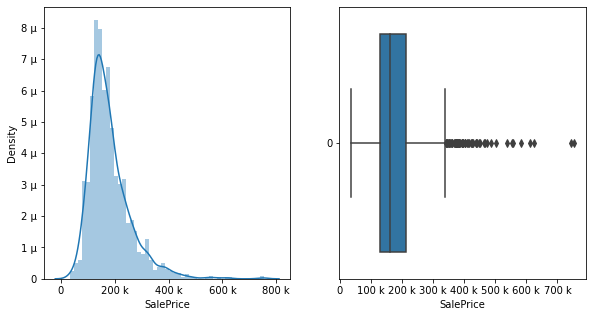

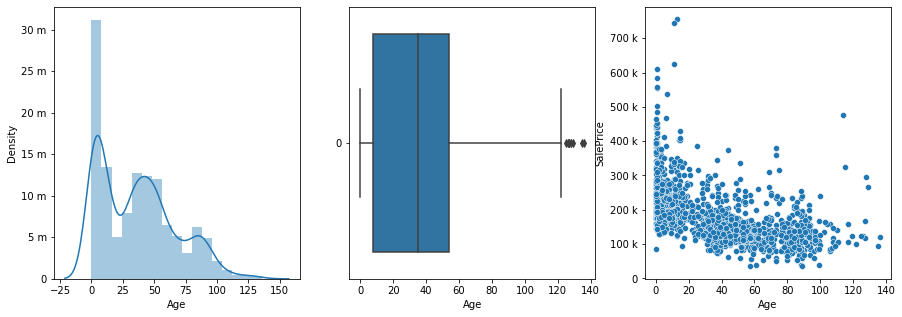

In [19]:
import matplotlib.ticker as ticker

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    g = sns.distplot(df_num[col])
    g.yaxis.set_major_formatter(ticker.EngFormatter())
    g.xaxis.set_major_formatter(ticker.EngFormatter())
    
    plt.subplot(1,3,2)
    g = sns.boxplot(df_num[col])
    g.yaxis.set_major_formatter(ticker.EngFormatter())
    g.xaxis.set_major_formatter(ticker.EngFormatter())
    
    if (col != 'SalePrice'):
        plt.subplot(1,3,3)
        g = sns.scatterplot(x=col, y='SalePrice', data=df_num)
        g.yaxis.set_major_formatter(ticker.EngFormatter())
        g.xaxis.set_major_formatter(ticker.EngFormatter())
        plt.show()

**Insights:**
- We can see **Linear Pattern** between: 
    - `LotFrontage` and `SalePrice`
    - `TotalBsmtSF` and `SalePrice`
    - `1stFrtSF` and `SalePrice`
    - `GrLivArea` and `SalePrice`
- The distribution of `SalePrice` is Positive Skew

In [20]:
# Check the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

The skewness of target variable is way greater than 1, we should use log transformation to transform the target variable

In [21]:
df['SalePrice'] = np.log(df['SalePrice'])

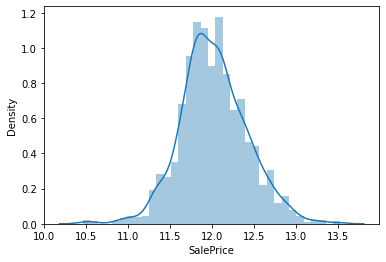

In [22]:
sns.distplot(df['SalePrice'])
plt.show()

The distribution of target variable (`SalePrice`) is normally distributed now

### 3.2. Visualize categorical columns

In [23]:
df_cat = df.select_dtypes(include=['category'])
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


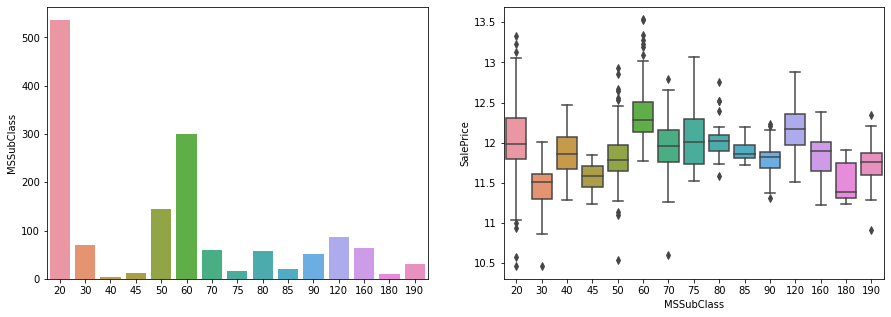

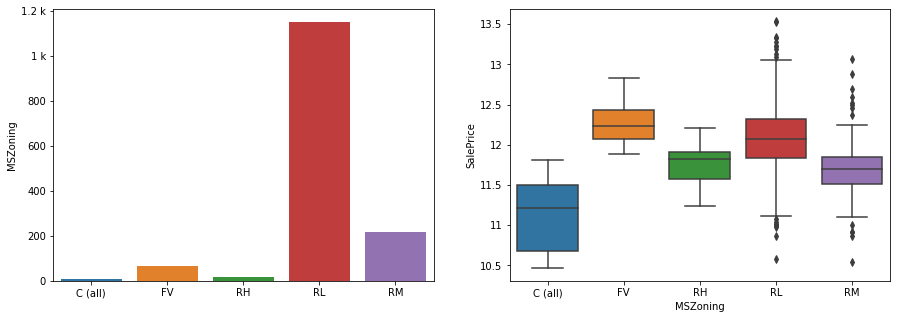

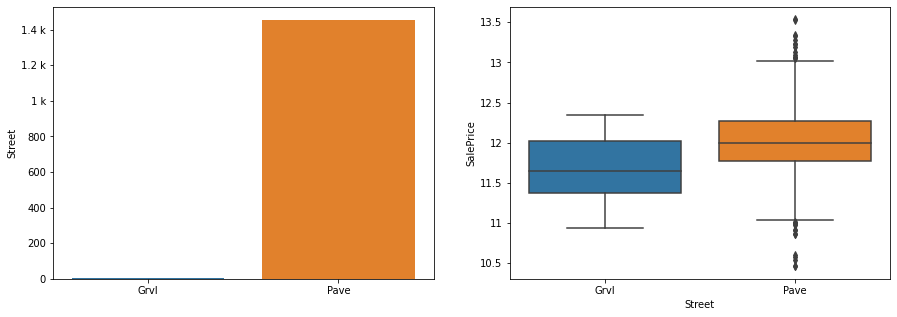

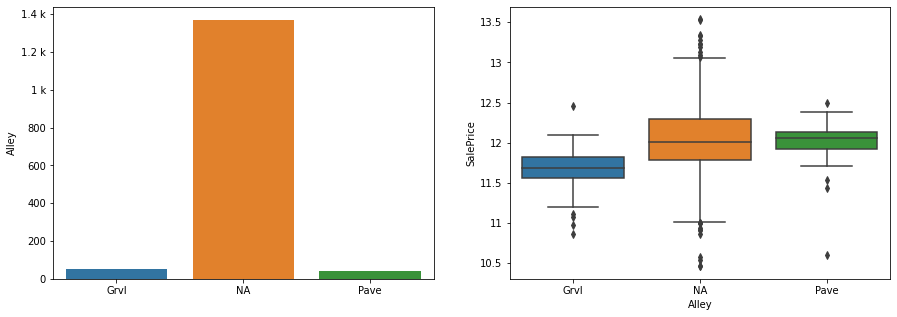

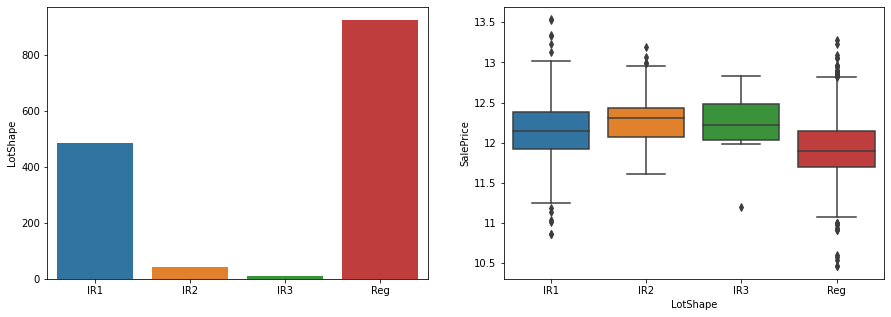

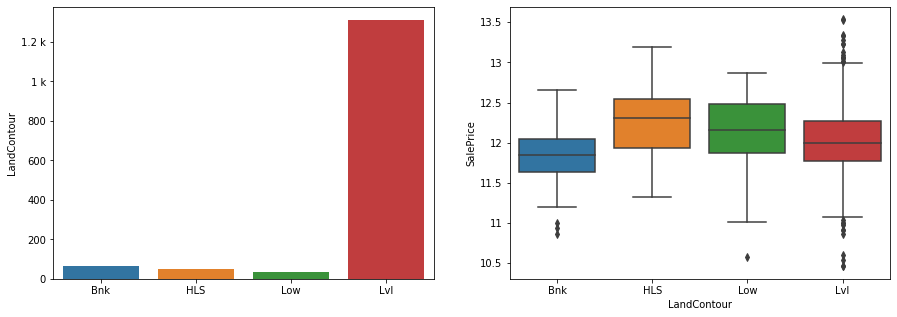

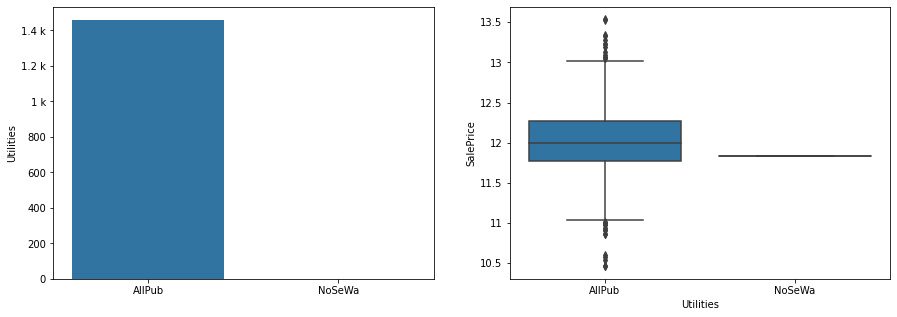

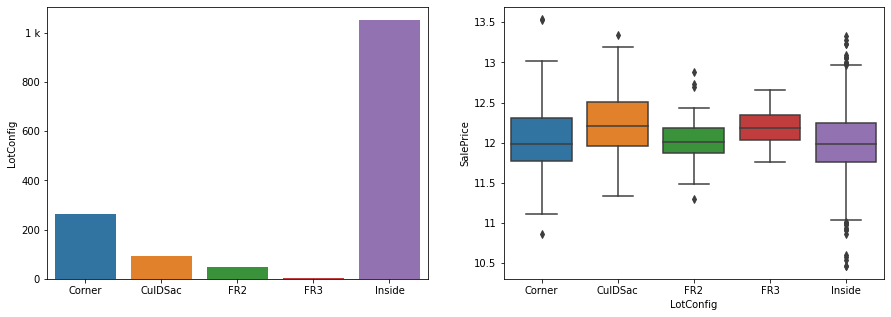

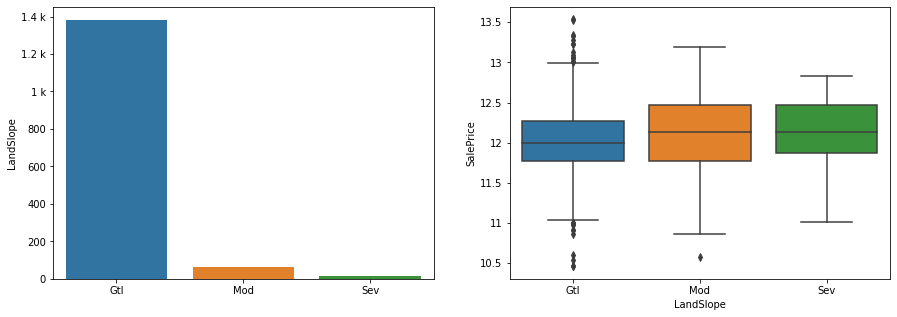

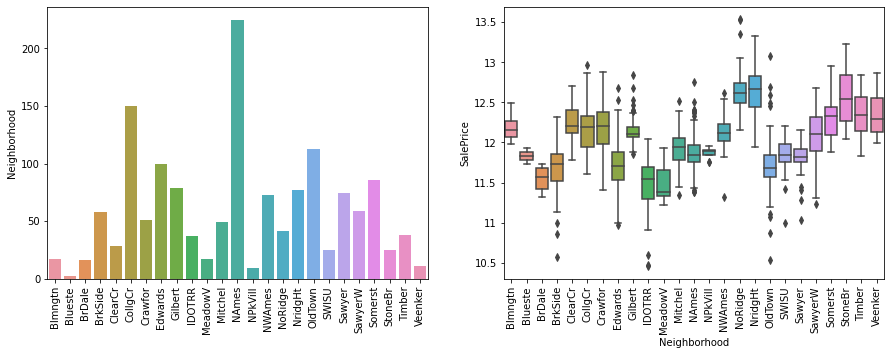

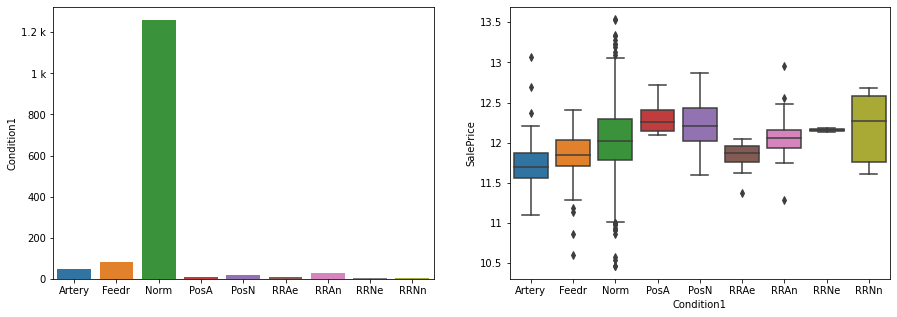

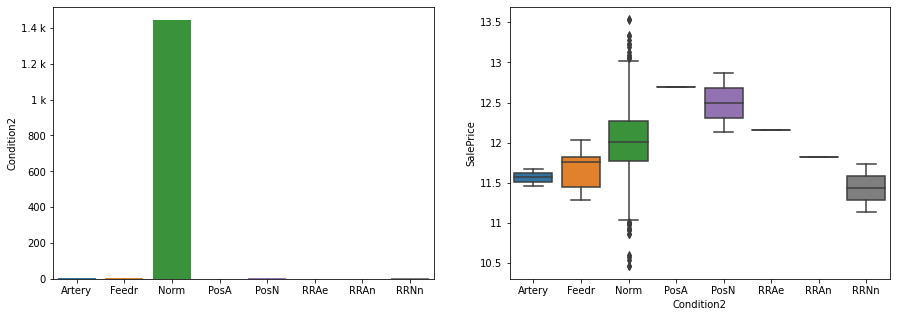

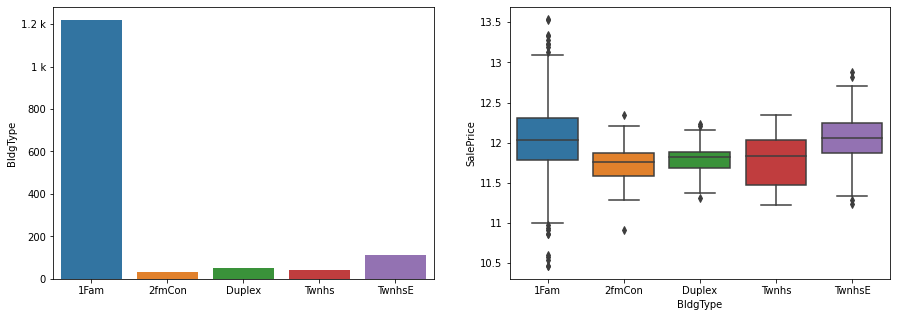

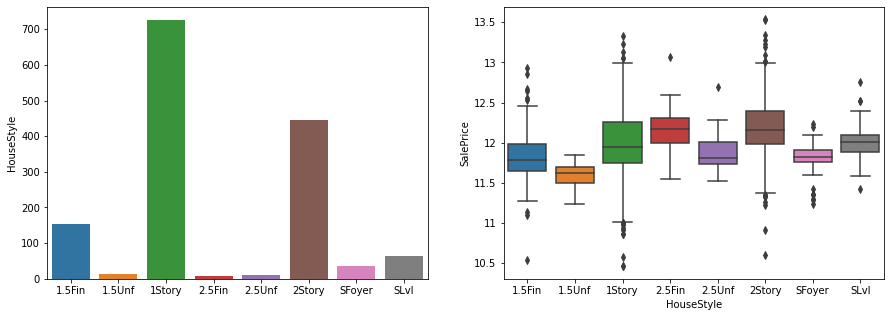

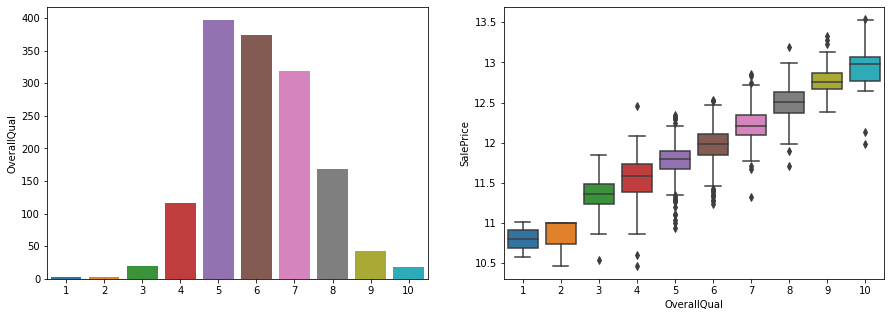

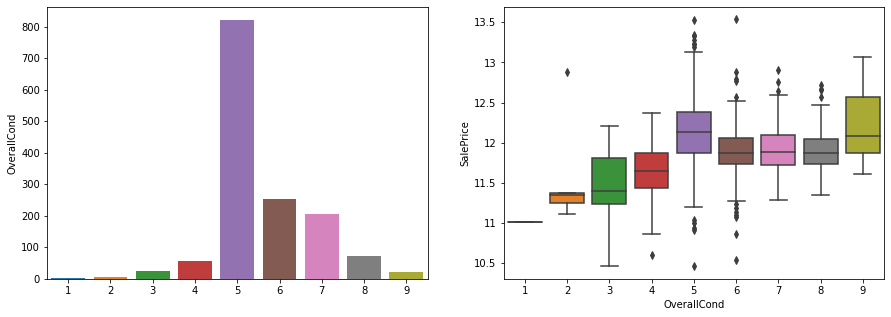

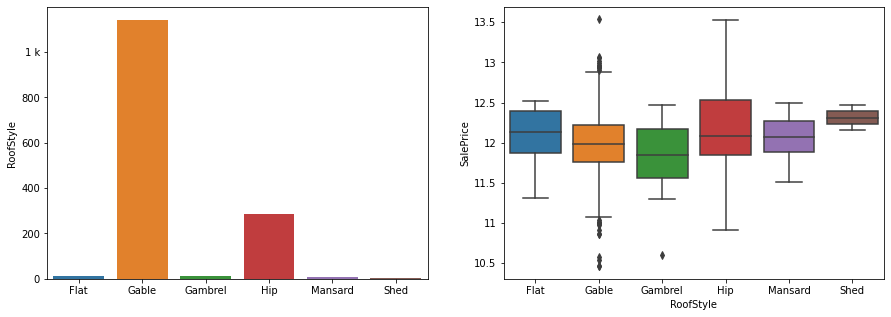

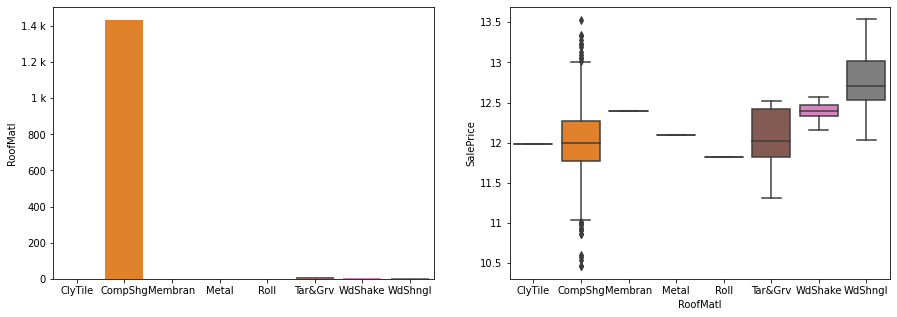

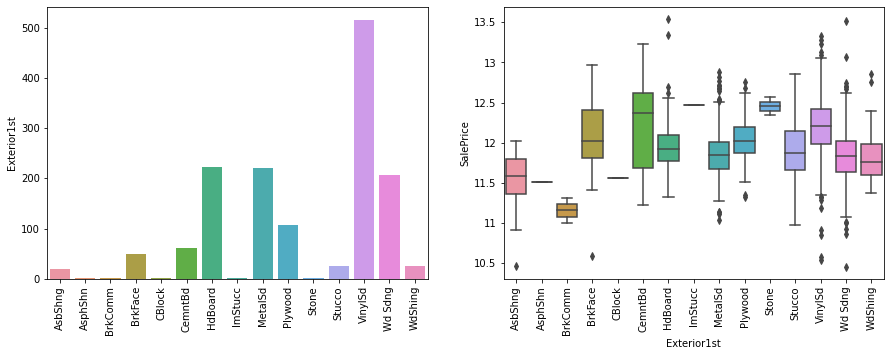

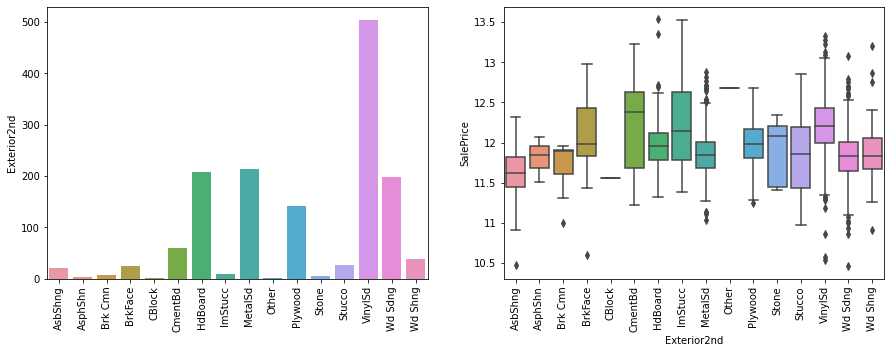

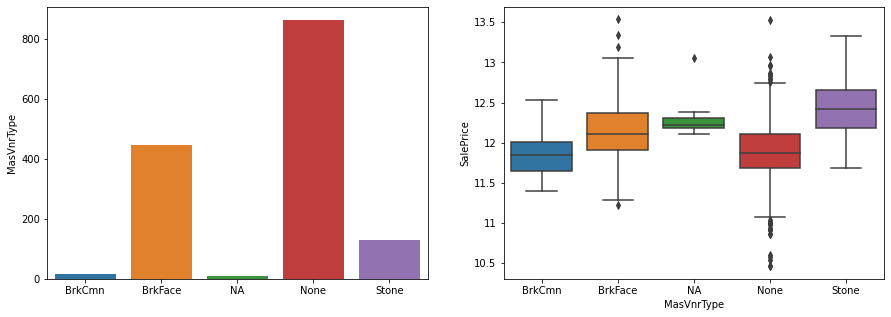

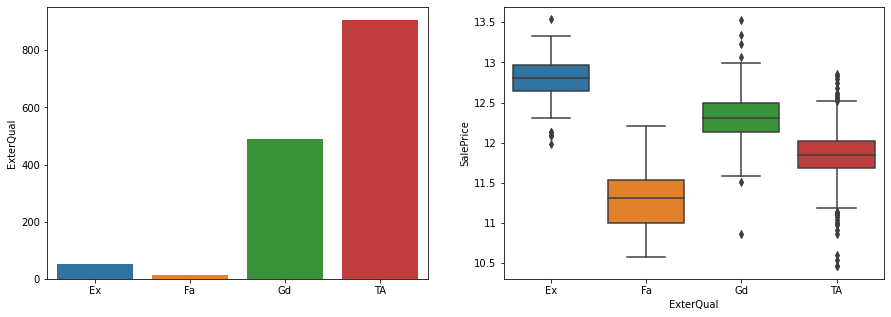

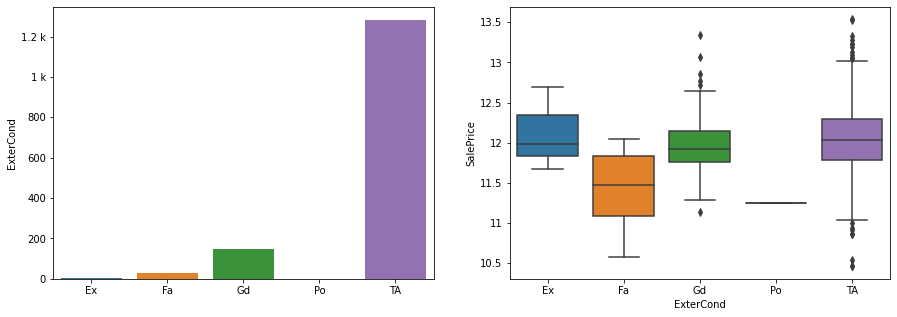

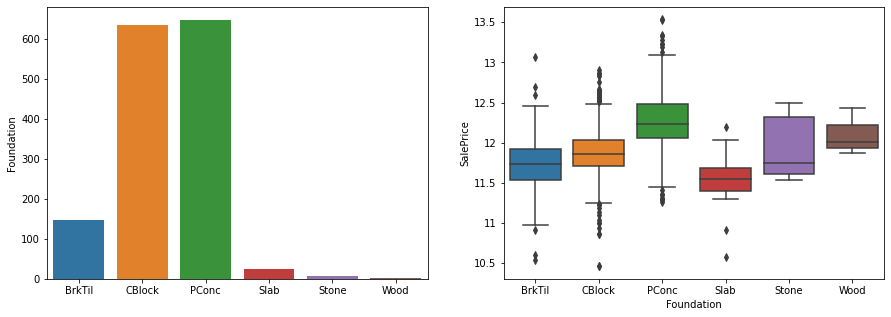

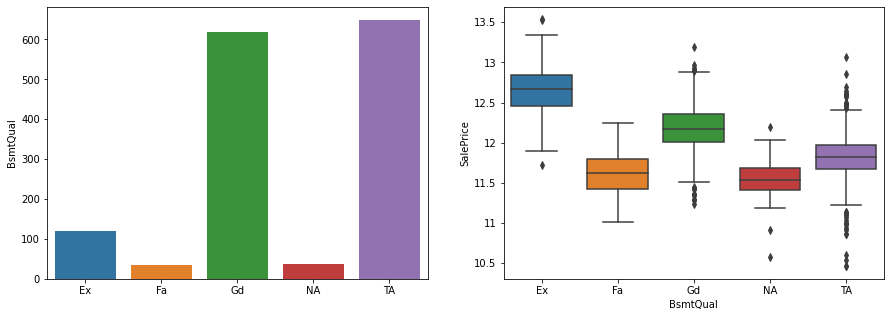

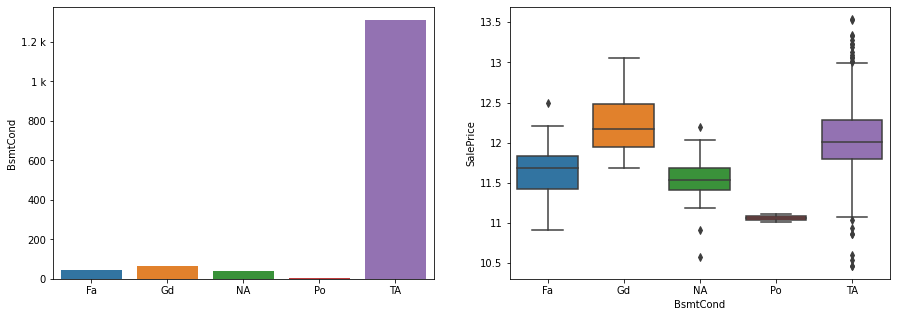

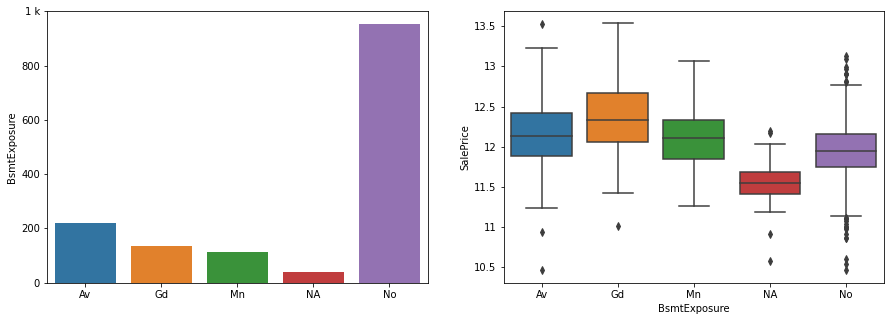

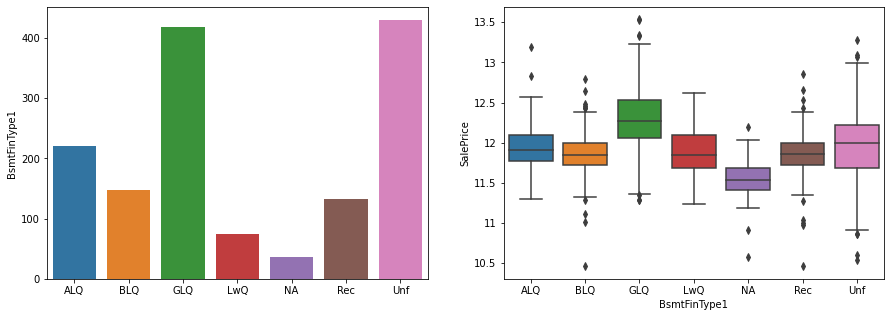

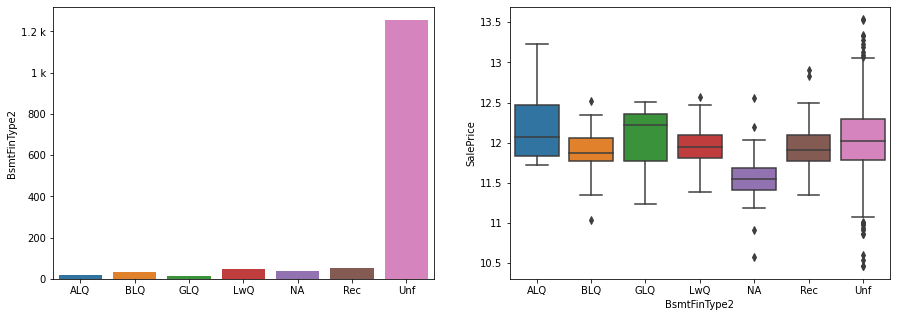

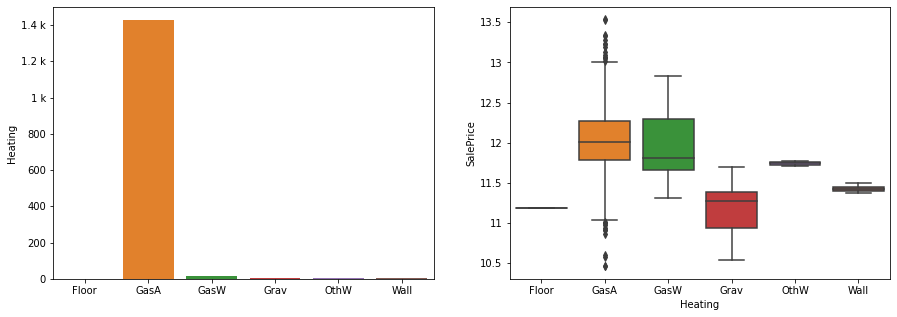

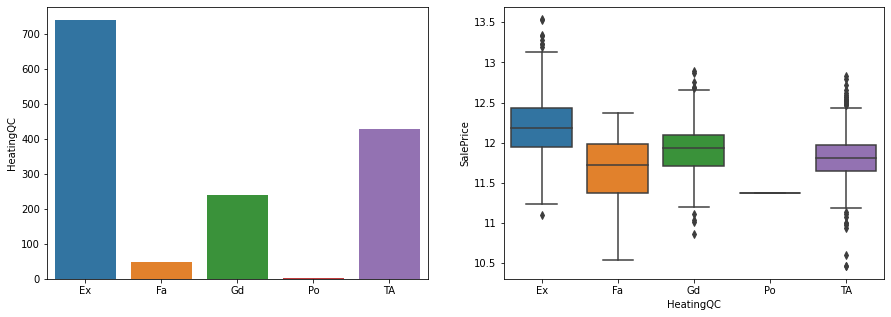

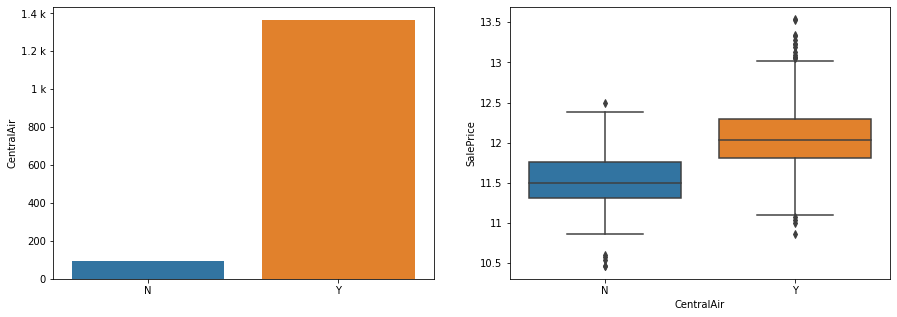

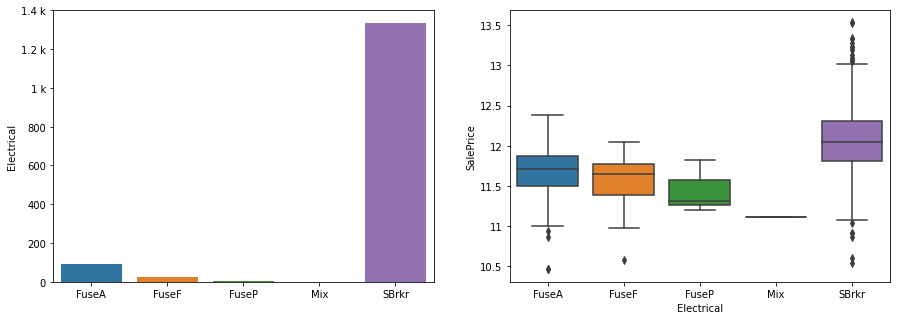

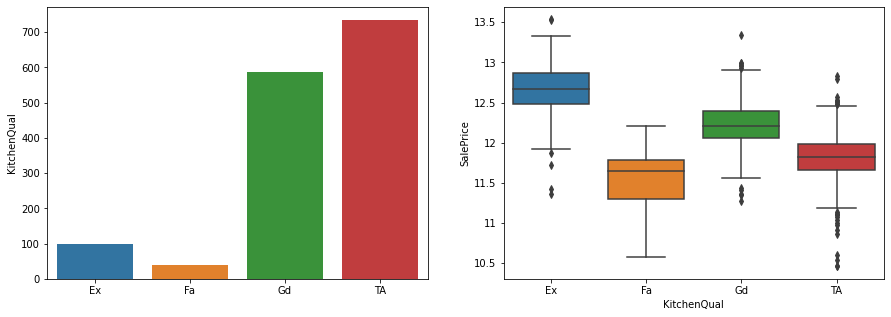

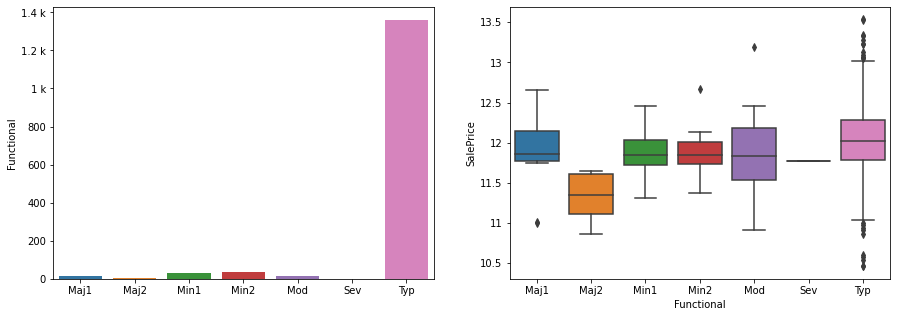

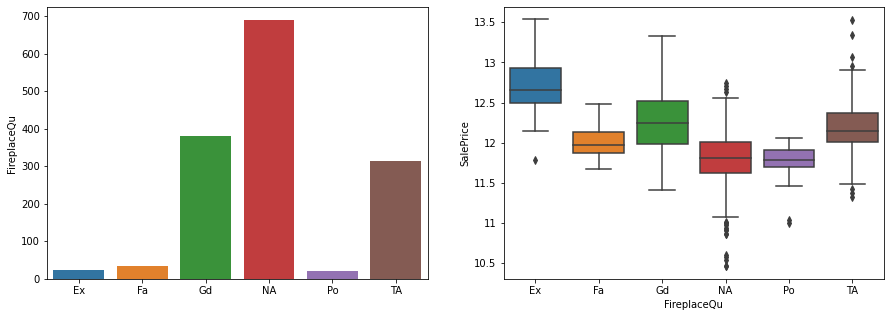

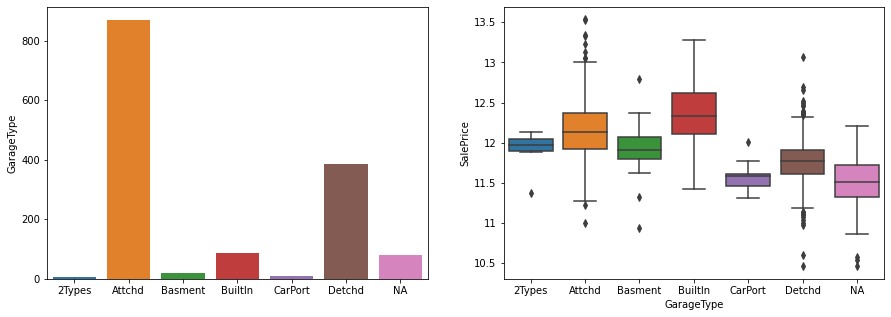

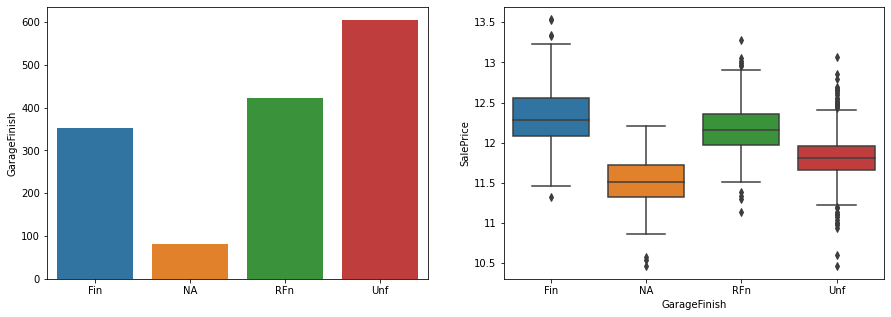

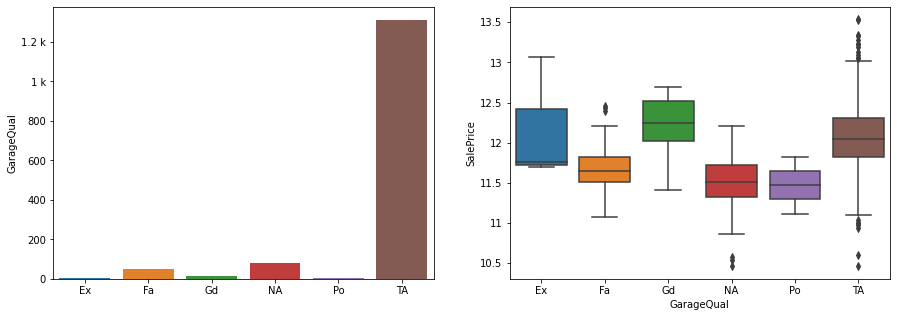

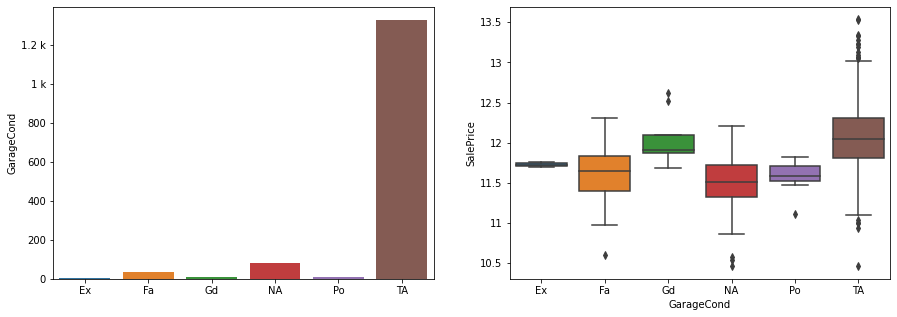

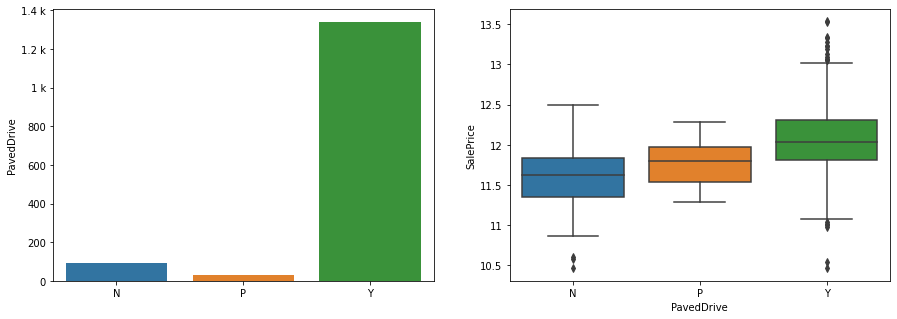

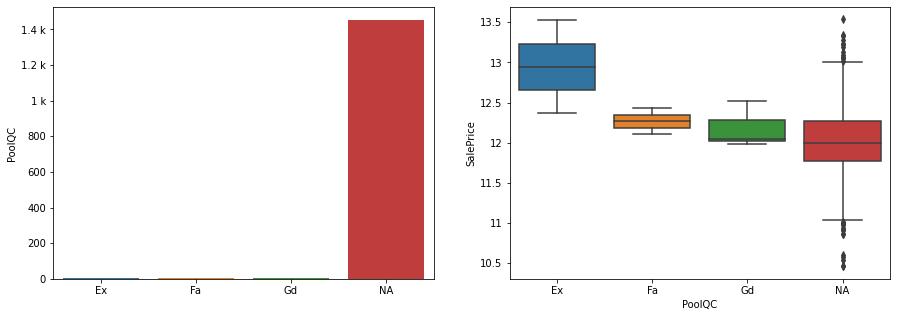

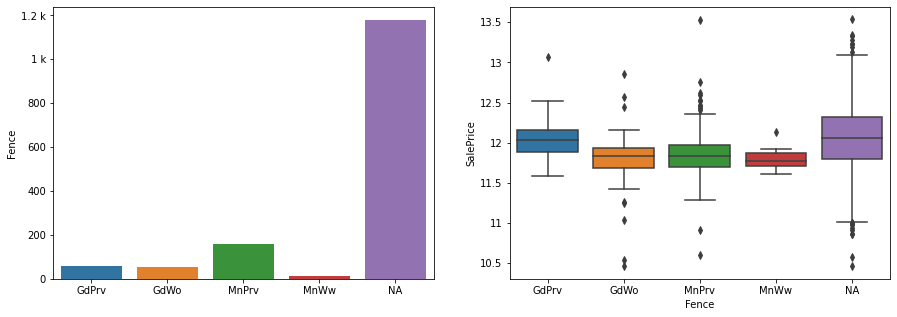

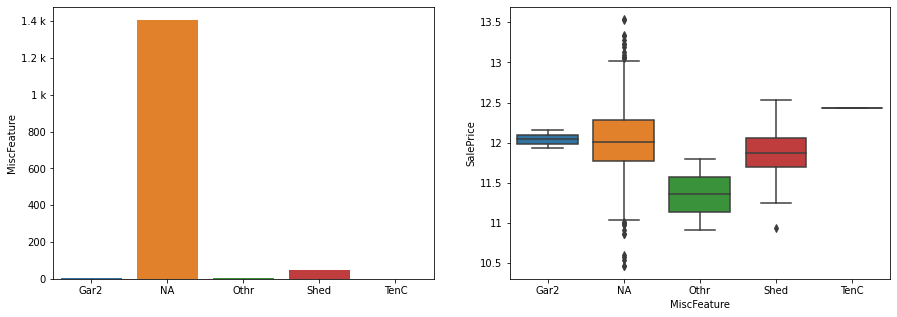

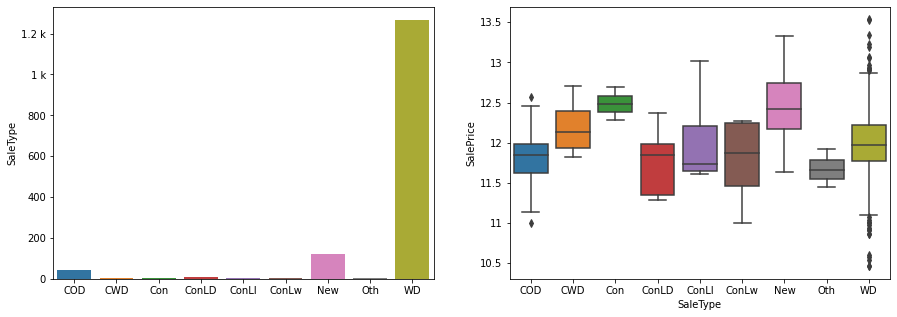

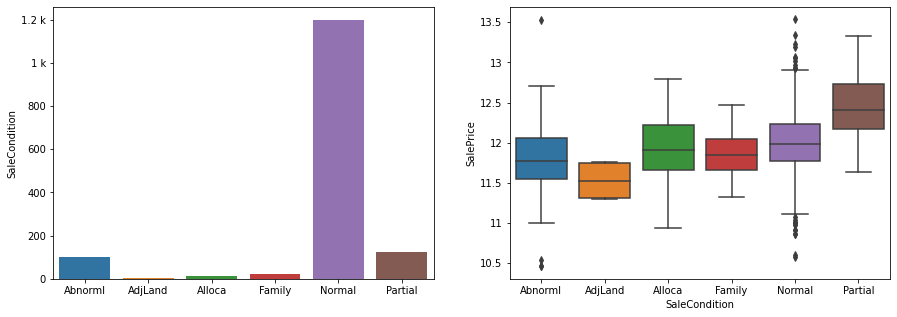

In [24]:
need_rotation = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in df_cat.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    g = sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    g.yaxis.set_major_formatter(ticker.EngFormatter())
    if col in need_rotation:
        plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    g = sns.boxplot(x = df[col], y = 'SalePrice', data = df)
    g.yaxis.set_major_formatter(ticker.EngFormatter())
    if col in need_rotation:
        plt.xticks(rotation=90)

**Insights:**
We can highlight some variables that significantly affect the target variable `SalePrice`:
- `MSSubClass` with the value of `60` (2-STORY 1946 & NEWER)
- `Neighborhood` with the value of `NridgHt` (Northridge Heights)
- `Condition2` with the value of `PosN` (Near positive off-site feature--park, greenbelt, etc.)
- `OverallQual`: the higher value in Overall Quality, the higher value in sale price
- `RoofMatl` with the value of `WdShngl` (Wood Shingles)
- `MasVnrType` with the value of `Stone`
- `ExterQual` with the value of `Ex`
- `BsmtQual` with the value of `Ex`
- `BsmtFinType1` with the value of `GLQ` (Good Living Quarters)
- `CentralAir` with the value of `Y`
- `Electrical` with the value of `Sbrkr`
- `KitchenQual` with the value of `Ex`
- `FireplaceQu` with the value of `Ex`
- `GarageType` with the value of `BuiltIn`
- `PoolQC` with the value of `Ex`
- `SaleType` with the value of `New`
- `SaleCondition` with the value of `Partial`

## IV. Data Preparation

### 4.1. Train-test spliting

In [25]:
from sklearn.model_selection import train_test_split

y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### 4.2. Outlier treatment

Let's do outlier treatment on training data. First plotting the box plot for each numeric column

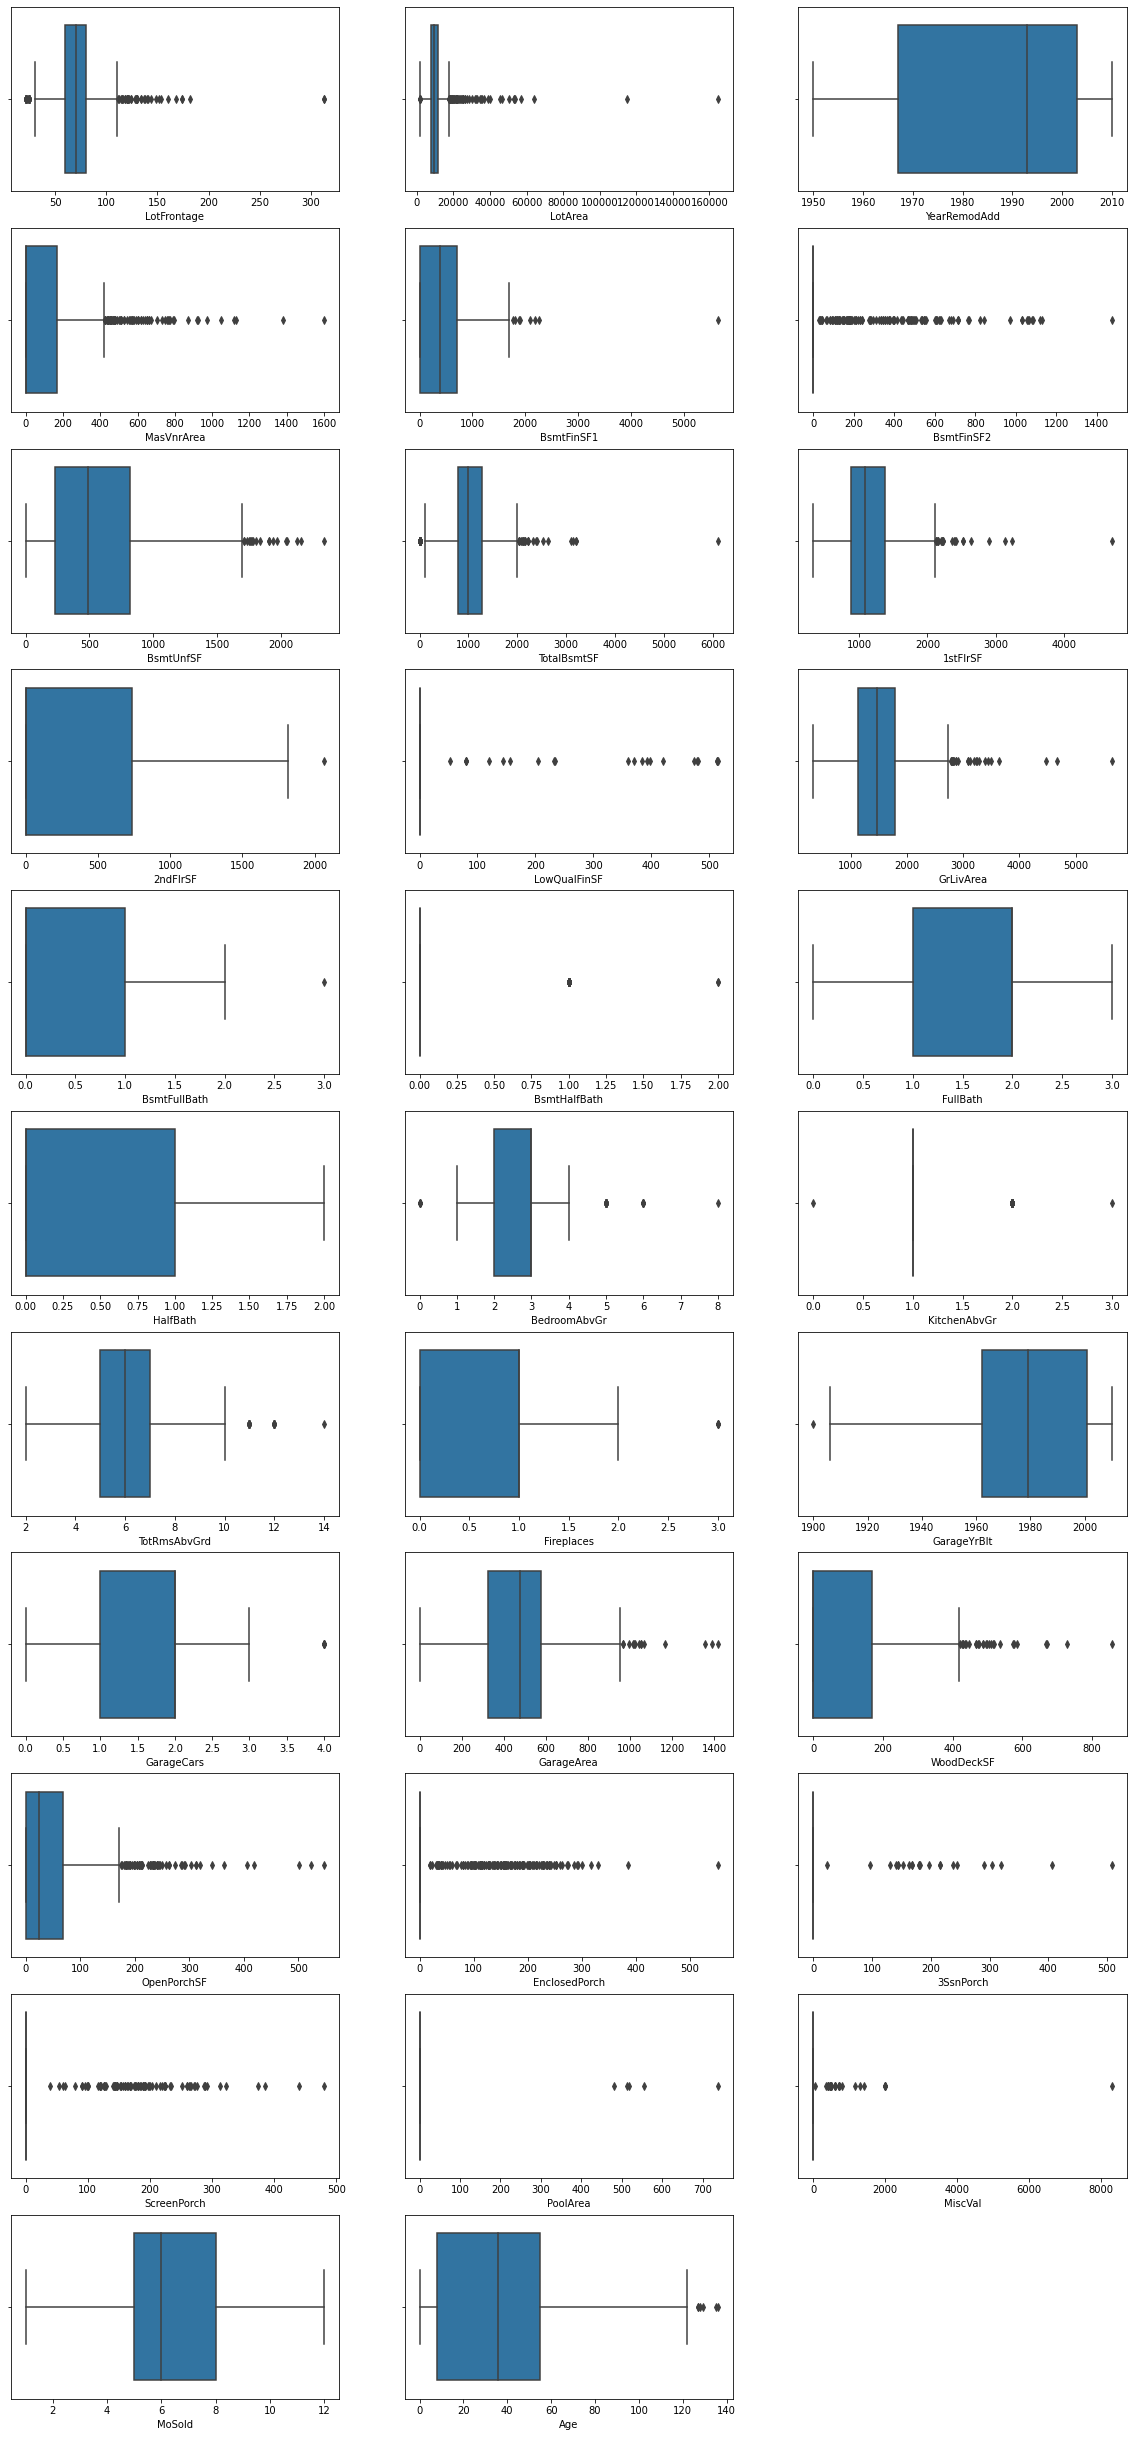

In [26]:
import math

num_columns = X.select_dtypes(['int64', 'float64']).columns

def draw_box_plot_on_num_features():
    num_of_rows = math.ceil(len(num_columns) / 3);

    plt.figure(figsize=(20, num_of_rows * 4))
    for i, col in enumerate(num_columns):
        plt.subplot(num_of_rows, 3, i + 1)
        sns.boxplot(x = col, data = X_train)
    plt.show();
    
draw_box_plot_on_num_features()

We can see outliers in some varialbles, let's cap them to between 5% and 95% quantile

In [27]:
for col in num_columns:
    X_train[col][X_train[col] <= X_train[col].quantile(0.05)] = X_train[col].quantile(0.05)
    X_train[col][X_train[col] >= X_train[col].quantile(0.95)] = X_train[col].quantile(0.95)

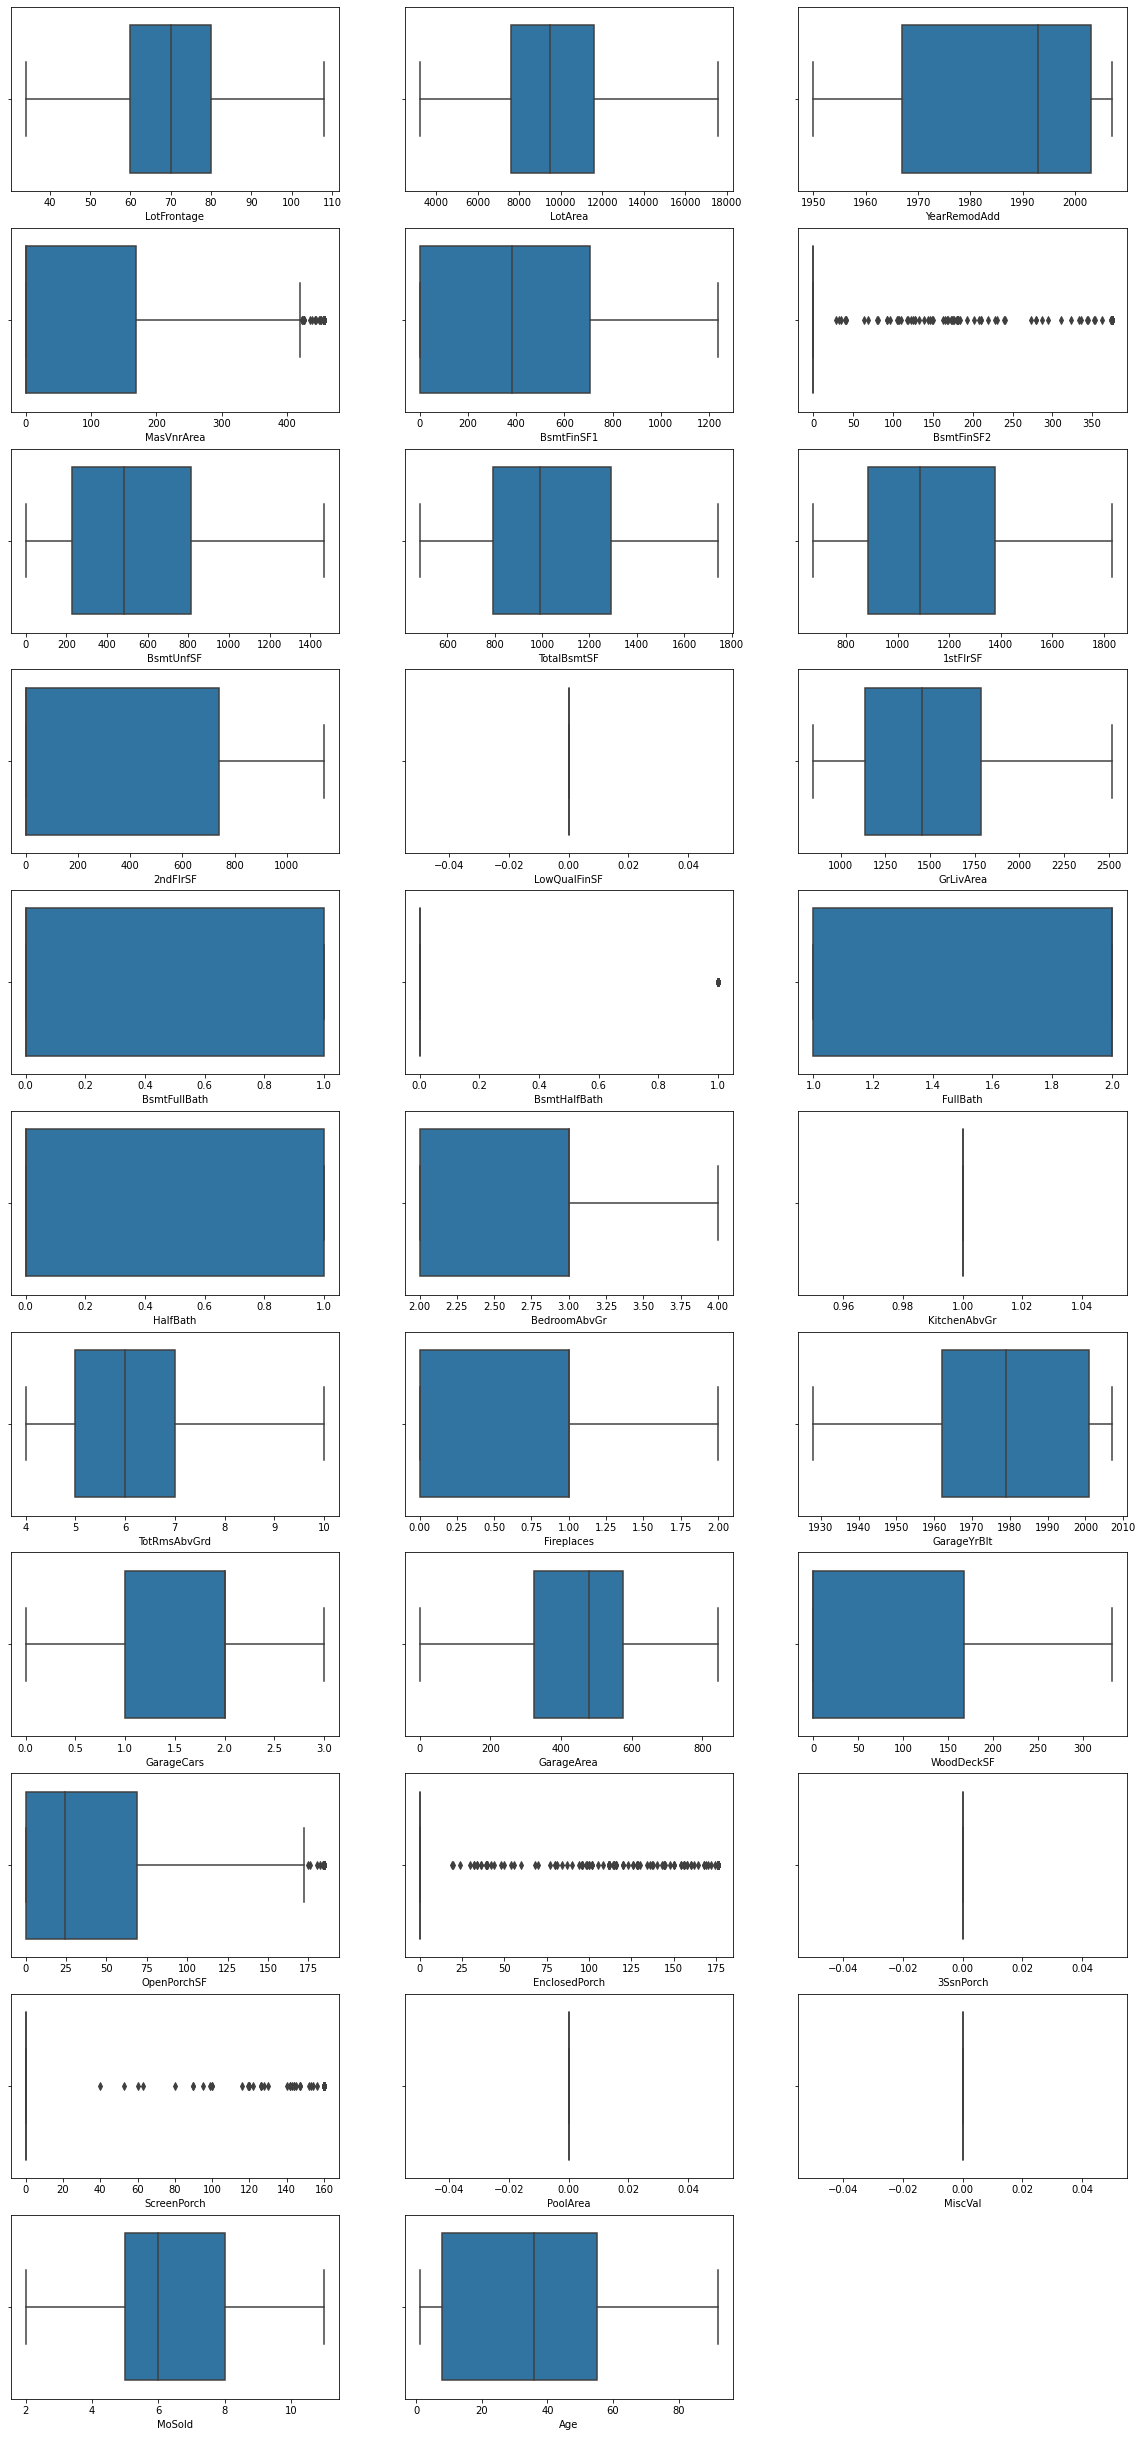

In [28]:
draw_box_plot_on_num_features()

It seems that we treated most of the outliers

### 4.3. Missing imputation and scaling

Let's inpect the distribution of `LotFrontage` and `GarageYrBlt`

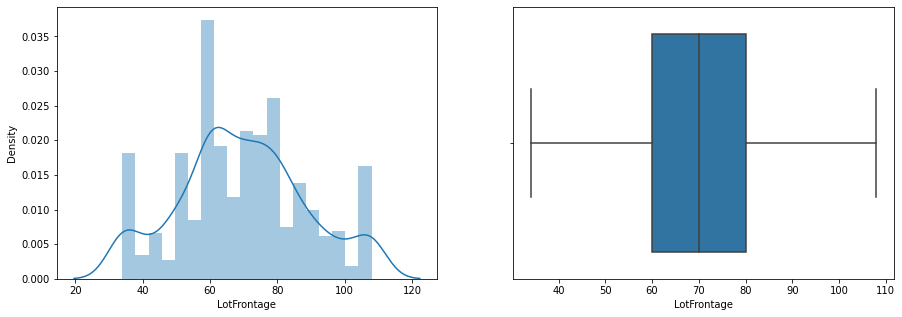

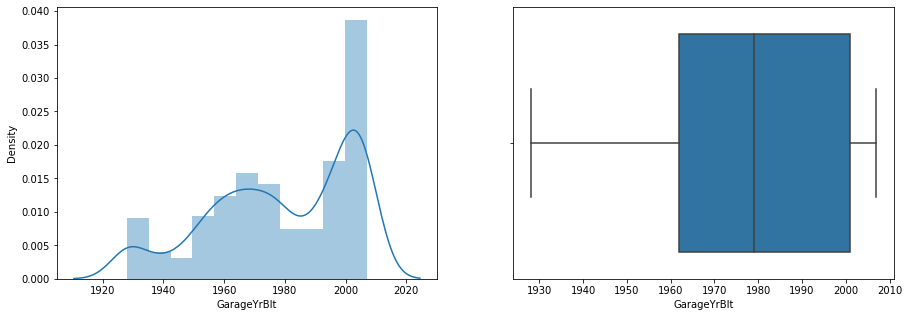

In [29]:
for col in ['LotFrontage', 'GarageYrBlt']:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    g = sns.distplot(X_train[col])
    
    plt.subplot(1,2,2)
    g = sns.boxplot(X_train[col])
    
plt.show()

We can use `median` imputation for `LotFrontage` and `GarageYrBlt`

In [30]:
X_train.shape

(1168, 78)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_columns),
    ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), X_train.select_dtypes(['category']).columns),
])

X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

## V. Model Building

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Write a function to print the metrics of a model
def print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    metrics = [
        [r2_score(y_train, y_train_pred), np.sum(np.square(y_train - y_train_pred)), mean_squared_error(y_train, y_train_pred)],
        [r2_score(y_test, y_test_pred), np.sum(np.square(y_test - y_test_pred)), mean_squared_error(y_test, y_test_pred)],
    ]
    result_df = pd.DataFrame(metrics, index=['Train', 'Test'], columns=['Score', 'RSS', 'MSE'])
    return result_df

In [33]:
# Write a function to draw a graph between Negative Mean Absolute Error and Alpha
def plot_negative_mean_abs_error_vs_alpha(model_result):
    cv_results = pd.DataFrame(model_result)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')

    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [34]:
# Create a list of alphas to be used for cross validation in both Ridge and Lasso
alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10., 20, 50, 100, 500, 1000]

### 5.1. Ridge Model

In [35]:
from sklearn.linear_model import Ridge
from scipy import sparse
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

params = {'alpha': alphas }

ridge = Ridge()

# Using cross validation to find the best alpha
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_prepared, y_train)

# Finding the best alpha value
model_cv_ridge.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 8.0}

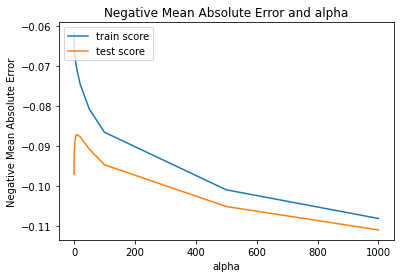

In [36]:
plot_negative_mean_abs_error_vs_alpha(model_cv_ridge.cv_results_)

In [37]:
# Let's use optimal alpha value of 8 for the ridge model
ridge = Ridge(alpha=8)
ridge.fit(X_train_prepared, y_train)

y_train_pred_ridge = ridge.predict(X_train_prepared)
y_pred_ridge = ridge.predict(X_test_prepared)

print_metrics(y_train, y_train_pred_ridge, y_test, y_pred_ridge)

,Score,RSS,MSE
Train,0.928075,13.217180,0.011316
Test,0.875518,6.091068,0.020860


The Score looks good, let's verify the assumption of model

In [38]:
# Write a function to draw the error terms and Homoscedasticity
def draw_model_assumption(y, y_pred):
    plt.figure(figsize=(15,5))
    residual = y - y_pred
    
    plt.subplot(1,2,1)
    g = sns.distplot(residual, bins = 20)
    
    plt.subplot(1,2,2)
    g = sns.scatterplot(y_train, residual)
    plt.plot(y, y - y, '-r')
    plt.ylabel('Residual')
    plt.show()

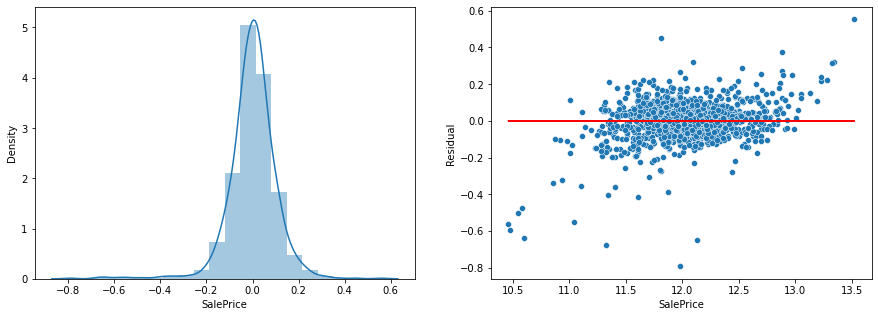

In [39]:
draw_model_assumption(y_train, y_train_pred_ridge)

- Error terms is normally distributed
- No visible pattern from the plot of residuals

In [40]:
# Write a function to list the features along with the coefficients, order by the significant level
def list_top_features_with_coeffiecients(model, feature_lists = None):
    # Because this is a log-linear model, we need to inverse log the coefficient to see the effect of features to target variable
    coefficients_list = np.exp(list(model.coef_))
    # Change affect to house price in %
    changes = [int((x-1) * 100) for x in coefficients_list]
    
    features = feature_lists if feature_lists != None else pipeline.get_feature_names_out()
               
    # Remove the steps from feature name
    cols = [feature.split('__')[1] for feature in features]
    
    data = list(zip(cols, coefficients_list, changes))
    result_df = pd.DataFrame(
        sorted(data,key=lambda x: abs(x[2]), reverse=True), 
        columns=['Feature', 'Coefficient', 'Affect to Housing Price (%)']) 
    result_df['Affect to Housing Price (%)'] = result_df['Affect to Housing Price (%)'].apply(lambda x: f'{x}%')
    return result_df

In [41]:
# Top 10 features in Ridge
list_top_features_with_coeffiecients(ridge).head(10)

,Feature,Coefficient,Affect to Housing Price (%)
0,OverallQual_9,1.116580,11%
1,OverallCond_3,0.885644,-11%
2,Neighborhood_StoneBr,1.107288,10%
3,Neighborhood_Crawfor,1.097302,9%
4,OverallCond_9,1.098291,9%
5,CentralAir_Y,1.095559,9%
6,Neighborhood_MeadowV,0.916628,-8%
7,MSZoning_RL,1.070519,7%
8,OverallQual_2,0.924474,-7%
9,OverallQual_3,0.925317,-7%


### 5.2. Lasso Model

In [42]:
from sklearn.linear_model import Lasso

params = {'alpha': alphas }

lasso = Lasso()

# Using cross validation to find the best alpha
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train_prepared, y_train)

# Finding the best alpha value
model_cv_lasso.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.001}

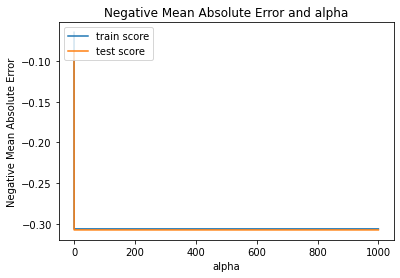

In [43]:
plot_negative_mean_abs_error_vs_alpha(model_cv_lasso.cv_results_)

In [44]:
# Let's use optimal alphe value of 0.001 for the lasso model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_prepared, y_train)

y_train_pred_lasso = lasso.predict(X_train_prepared)
y_pred_lasso = lasso.predict(X_test_prepared)

print_metrics(y_train, y_train_pred_lasso, y_test, y_pred_lasso)

,Score,RSS,MSE
Train,0.909501,16.630436,0.014238
Test,0.876824,6.027184,0.020641


The Score looks good, let's verify the assumption of model

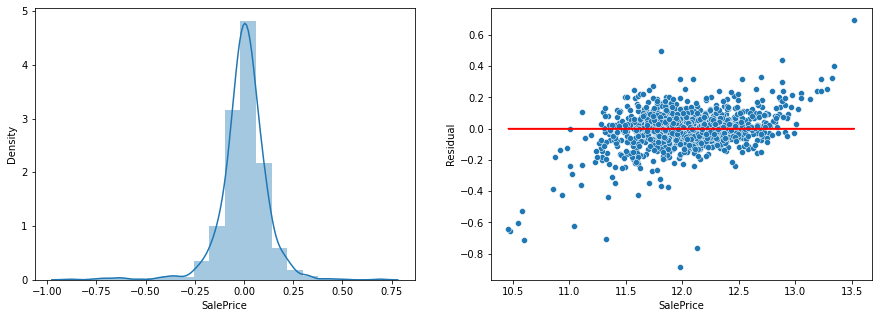

In [45]:
draw_model_assumption(y_train, y_train_pred_lasso)

In [46]:
list_top_features_with_coeffiecients(lasso).head(10)

,Feature,Coefficient,Affect to Housing Price (%)
0,OverallQual_9,1.168468,16%
1,OverallCond_3,0.853955,-14%
2,CentralAir_Y,1.122521,12%
3,Neighborhood_Crawfor,1.119126,11%
4,GrLivArea,1.106896,10%
5,Neighborhood_Somerst,1.079177,7%
6,Neighborhood_StoneBr,1.071337,7%
7,OverallQual_8,1.076084,7%
8,Functional_Typ,1.070031,7%
9,SaleType_New,1.072012,7%


In [47]:
# Check numboer of features removed
lasso_features = list_top_features_with_coeffiecients(lasso).to_numpy()
sum(1 for i in lasso_features if np.log(i[1]) == 0)

191

191 Features were removed by Lasso Model

## VI. Summary

The Score for both **Ridge** and **Lasso** are quite good
- Ridge
    - Train Score: **0.928**
    - Test Score: **0.876**
- Lasso
    - Train Score: **0.91**
    - Test Score: **0.877**


Optimal Lambda for each model:
- Ridge: **8**
- Lasso: **0.001**

**We should choose Lasso Model over Ridge because it helps us doing Feature Selection and remove insignificant features (190 features were removed in this case**

Let's take a look at top 10 features in Lasso Model again:

In [48]:
list_top_features_with_coeffiecients(lasso).head(10)

,Feature,Coefficient,Affect to Housing Price (%)
0,OverallQual_9,1.168468,16%
1,OverallCond_3,0.853955,-14%
2,CentralAir_Y,1.122521,12%
3,Neighborhood_Crawfor,1.119126,11%
4,GrLivArea,1.106896,10%
5,Neighborhood_Somerst,1.079177,7%
6,Neighborhood_StoneBr,1.071337,7%
7,OverallQual_8,1.076084,7%
8,Functional_Typ,1.070031,7%
9,SaleType_New,1.072012,7%


***Indicates that:***
- `OverallCond` (Overall condition of the house): `Fair` condition will result in a reduce in house price by 14%
- `OverallQual` (Overal material and finish of the house) highly affects the price of the house, `Very Good` and `Excellent` condition can increase house price from 1.08 to 1.17 times
- `CentralAir_Y` (Central air conditioning): If the house has a centralized air conditioning system, the price will increase by 1.12 times
- `Neighborhood_Crawfor`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`: If the house is located within Crawford, Somerset and Stone Brook the housing price can go up from 7% to 11%
- `GrLivArea`: One foot of area above the ground will result in 1.11 times increase in the price of the house
- `SaleType_New`: Houses that were just constructed and sold will be 1.07 times higher in price than the others

## VII. Assignment Questions

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer**

The optimal value for **Ridge** is 8 while the optimal value for **Lasso** is 0.001

Let's double the alpha to check for the changes

- **Ridge** (alpha value of 16) 

In [49]:
ridge_16 = Ridge(alpha=16)
ridge_16.fit(X_train_prepared, y_train)

y_train_pred_ridge_16 = ridge_16.predict(X_train_prepared)
y_pred_ridge_16 = ridge_16.predict(X_test_prepared)

print_metrics(y_train, y_train_pred_ridge_16, y_test, y_pred_ridge_16)

,Score,RSS,MSE
Train,0.921735,14.382278,0.012314
Test,0.873962,6.167181,0.021120


In [50]:
list_top_features_with_coeffiecients(ridge_16).head(10)

,Feature,Coefficient,Affect to Housing Price (%)
0,OverallQual_9,1.094483,9%
1,OverallCond_3,0.905350,-9%
2,CentralAir_Y,1.090714,9%
3,Neighborhood_Crawfor,1.086704,8%
4,Neighborhood_StoneBr,1.074609,7%
5,GrLivArea,1.067843,6%
6,Condition1_Norm,1.060987,6%
7,OverallQual_3,0.937040,-6%
8,OverallQual_8,1.060895,6%
9,OverallCond_7,1.063464,6%


Changes in metrics compare to alpha value of 8:
- Train score decreases from 0.928 to 0.922, Test score decreases from 0.876 to 0.874
- Train RSS increases from 13.217 to 14.382, Test RSS increases from 6.091 to 6.167
- Train MSE increases from 0.011 to 0.012, Test MSE in increases from 0.020 to 0.021

Most important predictor variables after the change is implemented:
- OverallQual_9
- OverallCond_3
- CentralAir_Y
- Neighborhood_Crawfor
- Neighborhood_StoneBr
- GrLivArea
- Condition1_Norm
- OverallQual_3
- OverallQual_8
- OverallCond_7

- **Lasso** (alpha value of 0.002) 

In [51]:
lasso_double = Lasso(alpha=0.002)
lasso_double.fit(X_train_prepared, y_train)

y_train_pred_lasso_double = lasso_double.predict(X_train_prepared)
y_pred_lasso_double = lasso_double.predict(X_test_prepared)

print_metrics(y_train, y_train_pred_lasso_double, y_test, y_pred_lasso_double)

,Score,RSS,MSE
Train,0.893128,19.639088,0.016814
Test,0.856143,7.039094,0.024106


In [52]:
list_top_features_with_coeffiecients(lasso_double).head(10)

,Feature,Coefficient,Affect to Housing Price (%)
0,GrLivArea,1.128568,12%
1,OverallQual_9,1.116716,11%
2,CentralAir_Y,1.118783,11%
3,OverallCond_3,0.896748,-10%
4,Neighborhood_Crawfor,1.092824,9%
5,TotalBsmtSF,1.066509,6%
6,Functional_Typ,1.066514,6%
7,Condition1_Norm,1.057364,5%
8,OverallQual_8,1.054059,5%
9,OverallCond_4,0.947241,-5%


In [53]:
# Check numboer of features removed
lasso_double_features = list_top_features_with_coeffiecients(lasso_double).to_numpy()
sum(1 for i in lasso_double_features if np.log(i[1]) == 0)

221

Changes in metrics compare to alpha value of 0.001:
- Train score decreases from 0.91 to 0.893, Test score decreases from 0.877 to 0.856
- Train RSS increases from 16.630 to 19.639, Test RSS increases from 6.027 to 7.039
- Train MSE increases from 0.014 to 0.017, Test MSE in increases from 0.021 to 0.024
- Number of eliminated features increases from 191 to 221

Most important predictor variables after the change is implemented:
- GrLivArea
- OverallQual_9
- CentralAir_Y
- OverallCond_3
- Neighborhood_Crawfor
- TotalBsmtSF
- Functional_Typ
- Condition1_Norm
- OverallQual_8
- OverallCond_4

### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Answer**

The optimal value of lambda for Ridge is **8**, and for Lasso is **0.001**

Both models score is good, but the business goal is to find the most important features so feature selection should be performed. So we should choose **Lasso*** in this scenario to eliminate less important features

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [54]:
from scipy import sparse

top_5_vars_lasso = ['OverallQual_9', 'CentralAir_Y', 'Neighborhood_Crawfor', 'GrLivArea', 'Neighborhood_StoneBr']
index_to_keep = []
new_features = []

for i, feature in enumerate(pipeline.get_feature_names_out()):
    feature_without_step = feature.split('__')[1]
    if (feature_without_step not in top_5_vars_lasso):
        index_to_keep.append(i)
        new_features.append(feature)

X_train_dropped_prepared = sparse.lil_matrix(sparse.csr_matrix(X_train_prepared)[:,index_to_keep])
X_test_dropped_prepared = sparse.lil_matrix(sparse.csr_matrix(X_test_prepared)[:,index_to_keep])

Rebuilding the lasso model

In [55]:
params = {'alpha': alphas }

lasso_dropped = Lasso()

# Using cross validation to find the best alpha
model_cv_lasso_dropped = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso_dropped.fit(X_train_dropped_prepared, y_train)

# Finding the best alpha value
model_cv_lasso_dropped.best_params_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'alpha': 0.0001}

New alpha is 0.0001

In [56]:
lasso_dropped = Lasso(alpha=0.0001)
lasso_dropped.fit(X_train_dropped_prepared, y_train)

y_train_pred_lasso_dropped = lasso_dropped.predict(X_train_dropped_prepared)
y_pred_lasso_dropped = lasso_dropped.predict(X_test_dropped_prepared)

print_metrics(y_train, y_train_pred_lasso_dropped, y_test, y_pred_lasso_dropped)

,Score,RSS,MSE
Train,0.937855,11.419959,0.009777
Test,0.826455,8.491802,0.029082


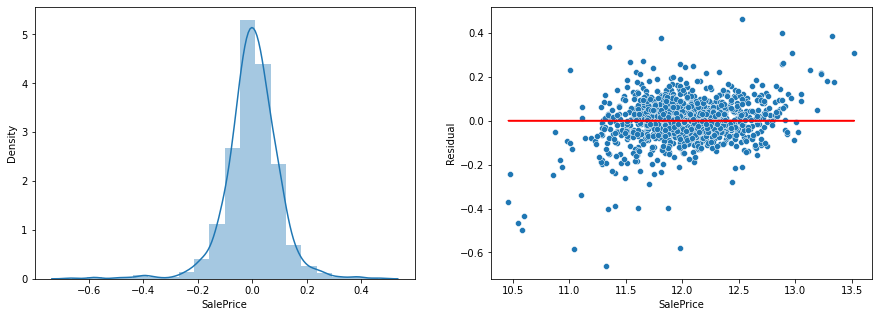

In [57]:
draw_model_assumption(y_train, y_train_pred_lasso_dropped)

In [58]:
# Print new top 5 features
list_top_features_with_coeffiecients(lasso_dropped, feature_lists=new_features).head(5)

,Feature,Coefficient,Affect to Housing Price (%)
0,Condition2_PosN,0.417991,-58%
1,MSZoning_FV,1.523940,52%
2,MSZoning_RH,1.521526,52%
3,MSZoning_RL,1.497821,49%
4,MSZoning_RM,1.444594,44%


New top 5 features for Lasso model now:
- Condition2_PosN
- MSZoning_FV
- MSZoning_RH
- MSZoning_RL
- MSZoning_RM

### Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

**Answer**

To make sure a model is robust and generalizable, we should:
- The robustness and generalization of a model can be achieved by removing the impact of outliers. For example, regression-based models are usually affected by outliers, while tree-based models are not
- Switching from mean squared error to mean absolute difference also helps reducing the impact of outliers.
- Keeping the model as simple as possible to avoid overfitting, using Lasso instead of Ridge to make use of its feature selection.
- Transforming the data to reduce skewness, for example, use a log transform for a skewed distribution of data.
- Removing outliers in training data, those outliers could badly affect the accuracy of the model

There are trade-offs between accuracy and robustness, we need to keep balance between them like the balance between bias-variance trade-offs, keep the model as simple as possible but don’t make it underfitting.
